In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.autolayout"] = True

In [2]:
data = 'BitcoinData.xlsx'

df = pd.read_excel(data)

trasaction_size = 250

In [3]:
df

,Date,Height,Blockchain Size (in MB),Average Transaction per Block,Total Transaction,UTXO Set,Mempool Count,Mempool Size (in B),Block Size (in MB)
0,2022-01-01,716500,382992.583,1086,699106399,79061892,13319,2627263,1.184
1,2021-01-01,664000,318686.000,1732,601835959,69579814,8367,49721566,1.288
2,2020-01-01,610800,255841.000,1446,490176938,64671678,3671,1540038,0.989
3,2019-01-01,556500,198101.000,1575,370039173,49596124,2515,1238543,0.996
4,2018-01-01,502000,149942.000,2300,289592587,62010620,94918,104589449,1.055
5,2017-01-01,446000,96929.000,1830,183961799,43922581,4400,4007832,0.868


In [4]:
Ns = df['Height'].to_numpy()[::-1]
bitcoin_size = df['Blockchain Size (in MB)'].to_numpy()[::-1]

dates = df['Date'][::-1]

In [5]:
def RAM_usage(N, b_size, arch_type="CC"):
    if arch_type == "CC":
        return (2*384 + 1e6*b_size)*N # RSA + RSA + TMR # 352Bytes extra
    elif arch_type == "MC":
        return (384 + 32 + 1e6*b_size)*N # RSA + MMR + TMR 
    elif arch_type == "B":
        return 384  + 1e6*b_size# RSA + TMR

In [6]:
def Disk_usage(N, arch_type="CC"):
    if arch_type == "CC":
        return (2*384 + 32)*N # RSA + RSA + TMR # 352Bytes extra
    elif arch_type == "MC":
        return (384 + 32 + 32)*N # RSA + MMR + TMR 
    elif arch_type == "B":
        return (384 + 32)*N # RSA + TMR

In [7]:
np.cumsum([Disk_usage(N-Ns[0]+1, "CC") for N in Ns])*1e-9

array([8.000000e-07, 4.480160e-02, 1.332024e-01, 2.650432e-01,
       4.394440e-01, 6.558448e-01])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


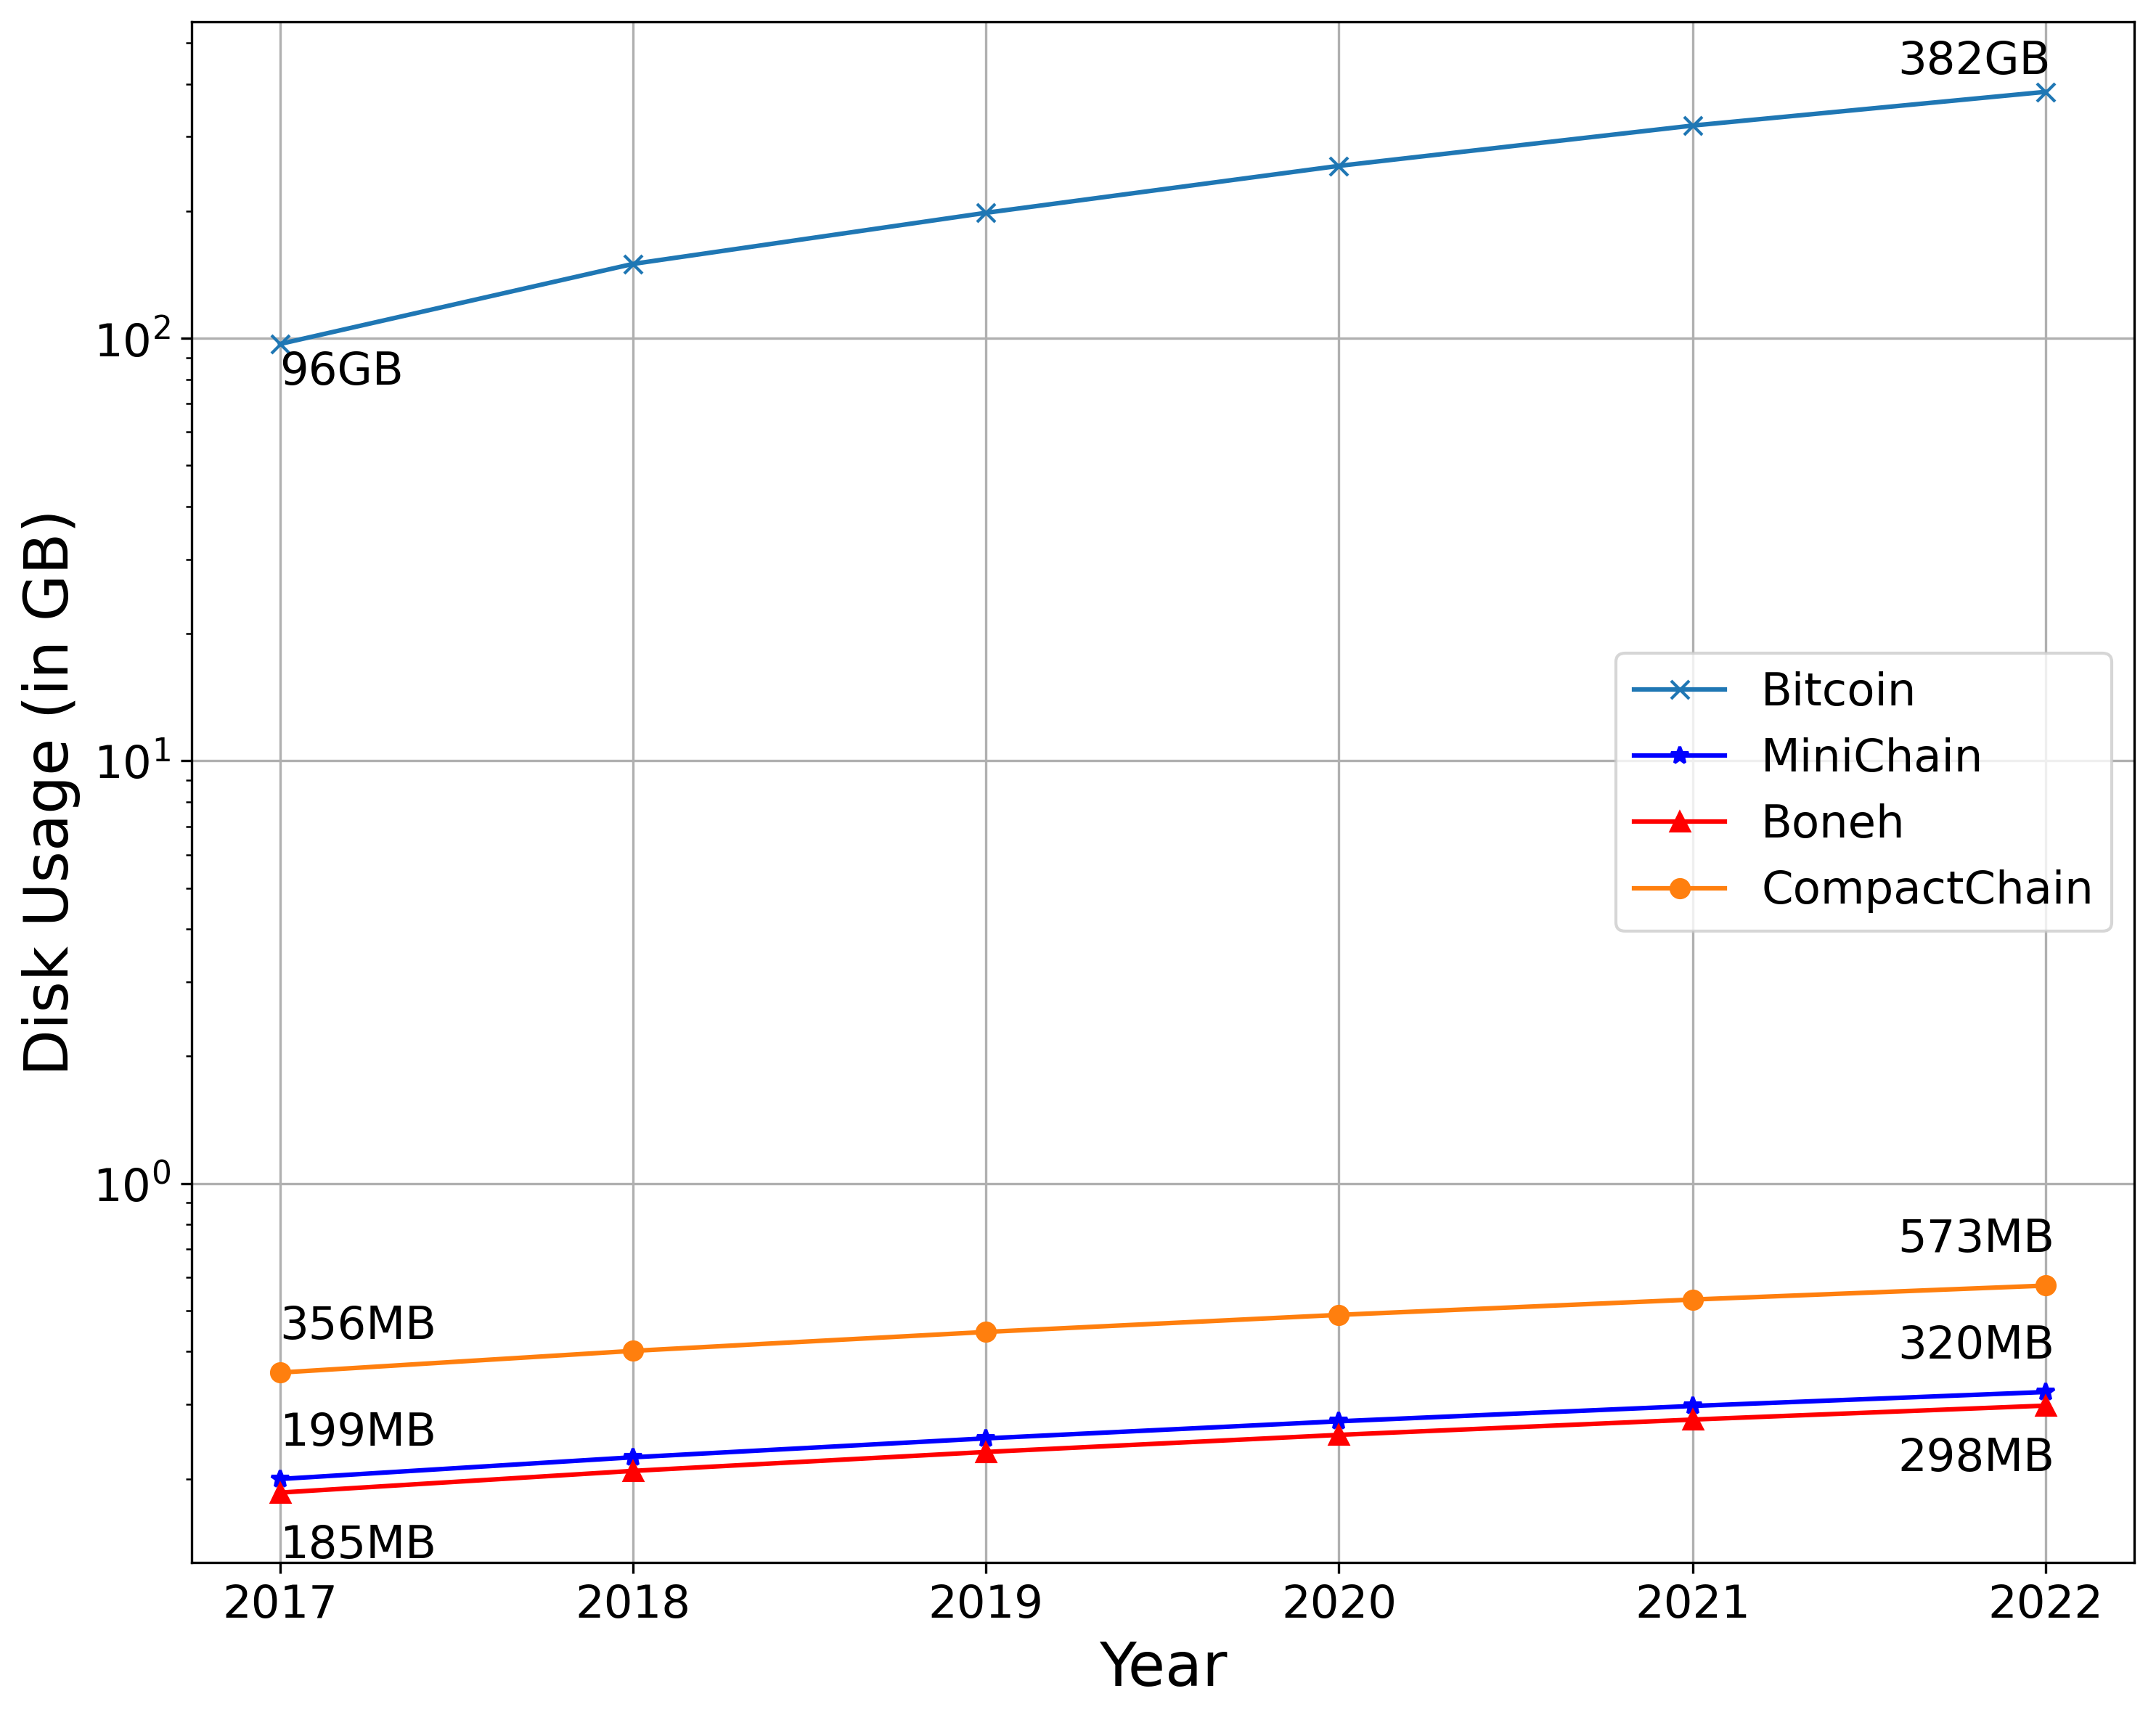

In [11]:
plt.figure(figsize=(10, 8))
# plt.title('Disk Usage', fontsize=25)
plt.semilogy(dates, bitcoin_size*1e-3, '-x',label='Bitcoin')
plt.semilogy(dates, np.array([Disk_usage(N, "MC") for N in Ns])*1e-9, 'b-*', label='MiniChain')
plt.semilogy(dates, np.array([Disk_usage(N, "B") for N in Ns])*1e-9, 'r-^', label='Boneh')
plt.semilogy(dates, np.array([Disk_usage(N, "CC") for N in Ns])*1e-9, '-o', label='CompactChain')


plt.text(pd.Timestamp('2021-08-01'), 1.1*bitcoin_size[5]*1e-3, '{}GB'.format(int(bitcoin_size[5]*1e-3)), fontsize=15)
plt.text(dates[5], 0.8*bitcoin_size[0]*1e-3, '{}GB'.format(int(bitcoin_size[0]*1e-3)), fontsize=15)

plt.text(pd.Timestamp('2021-08-01'), 1.2*Disk_usage(Ns[5], "MC")*1e-9, '{}MB'.format(int(Disk_usage(Ns[5], "MC")*1e-6)), fontsize=15)
plt.text(dates[5], 1.2*Disk_usage(Ns[0], "MC")*1e-9, '{}MB'.format(int(Disk_usage(Ns[0], "MC")*1e-6)), fontsize=15)

plt.text(pd.Timestamp('2021-08-01'), 1.2*Disk_usage(Ns[5], "CC")*1e-9, '{}MB'.format(int(Disk_usage(Ns[5], "CC")*1e-6)), fontsize=15)
plt.text(dates[5], 1.2*Disk_usage(Ns[0], "CC")*1e-9, '{}MB'.format(int(Disk_usage(Ns[0], "CC")*1e-6)), fontsize=15)

plt.text(pd.Timestamp('2021-08-01'), 0.7*Disk_usage(Ns[5], "B")*1e-9, '{}MB'.format(int(Disk_usage(Ns[5], "B")*1e-6)), fontsize=15)
plt.text(dates[5], 0.7*Disk_usage(Ns[0], "B")*1e-9, '{}MB'.format(int(Disk_usage(Ns[0], "B")*1e-6)), fontsize=15)

plt.ylabel('Disk Usage (in GB)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
# plt.ticks([1e0, 1e2])
plt.savefig('disk_usage.eps',  bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


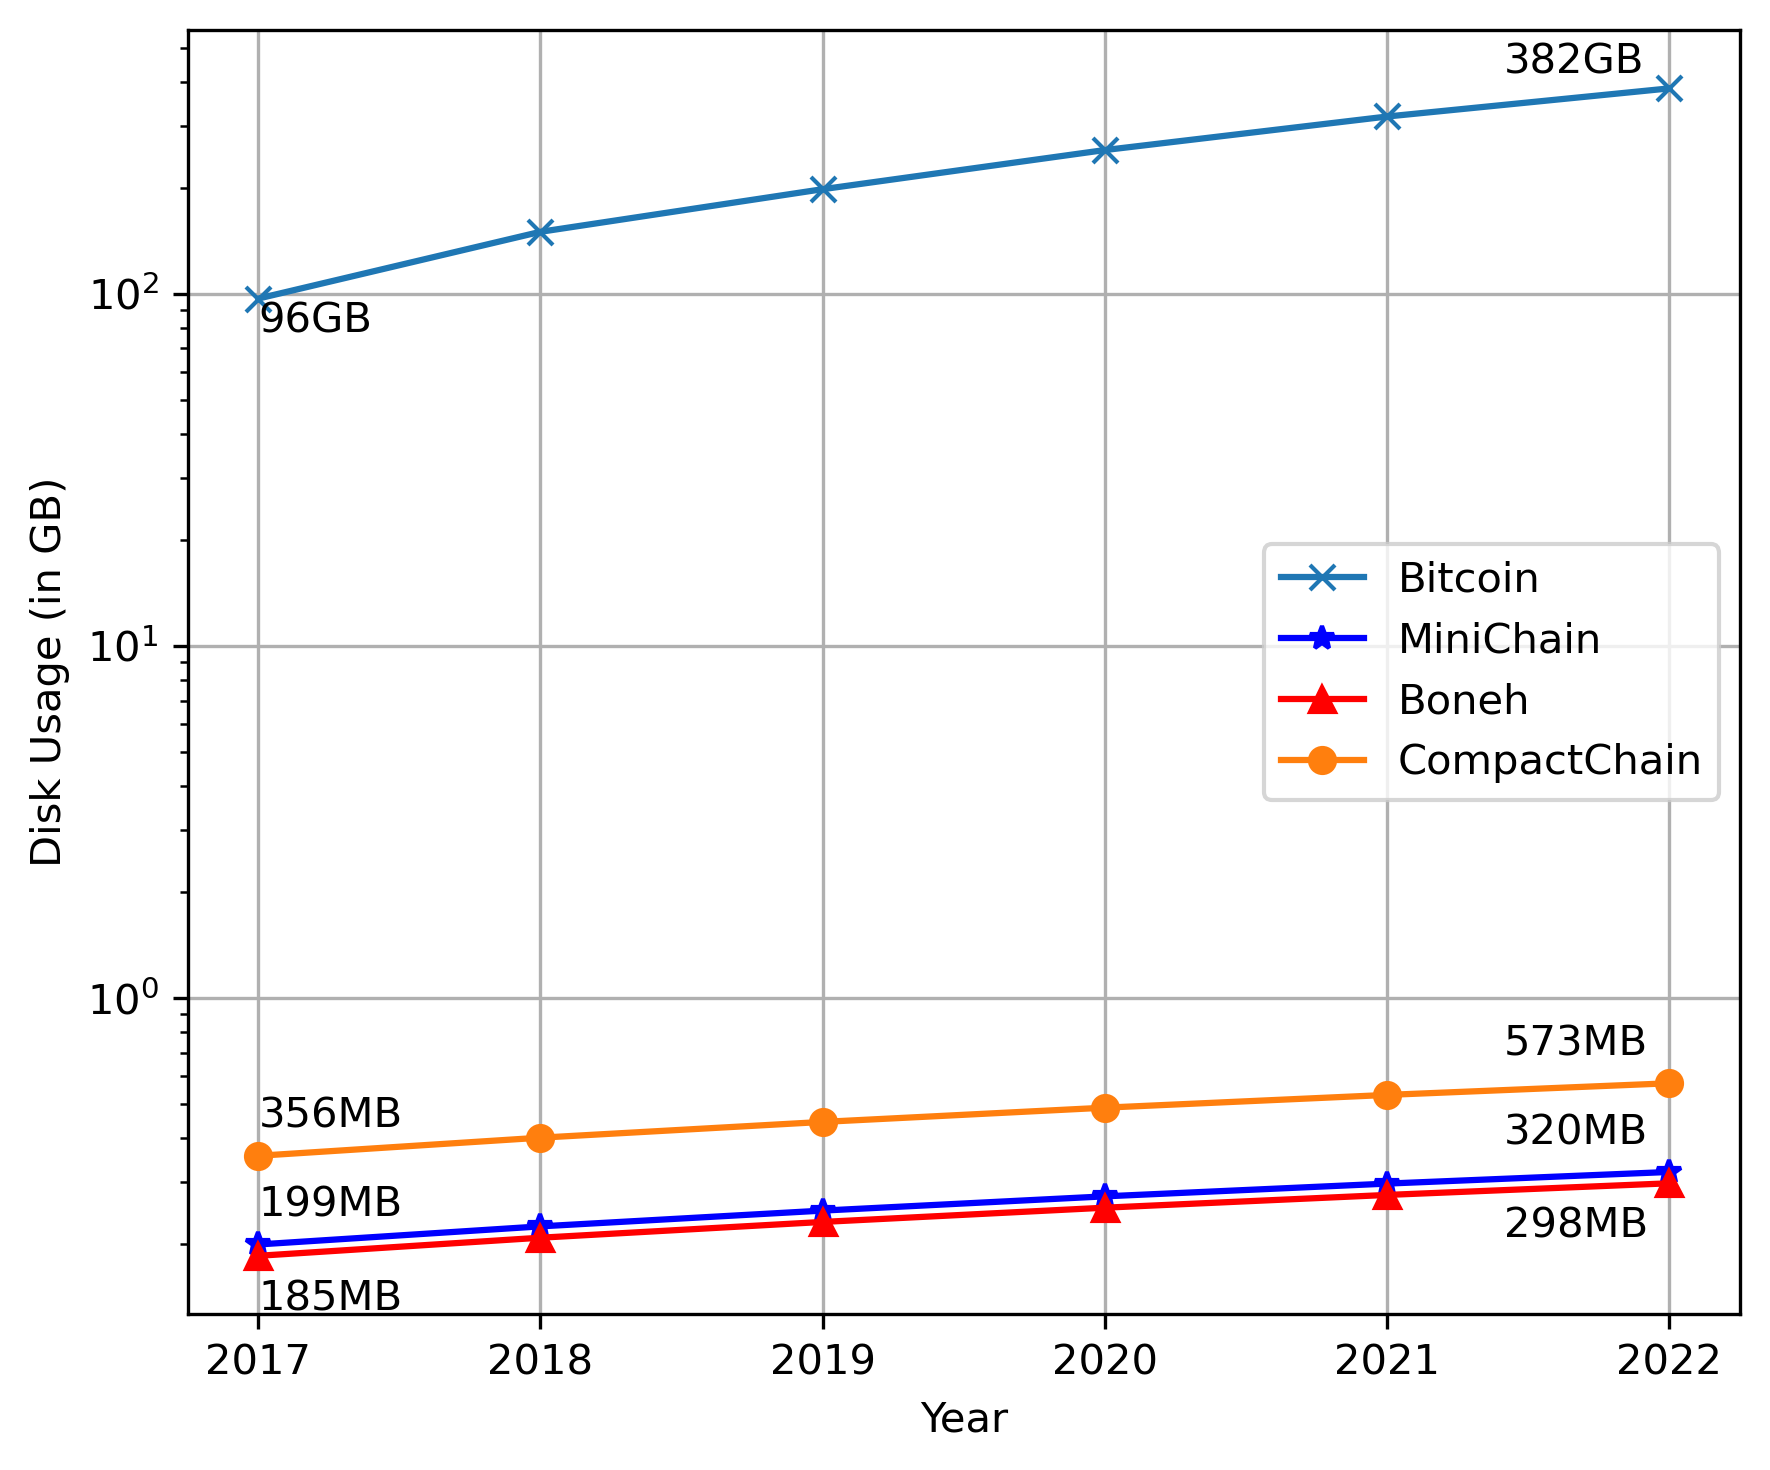

In [103]:
plt.figure(figsize=(6, 5))
# plt.title('Disk Usage', fontsize=25)
plt.semilogy(dates, bitcoin_size*1e-3, '-x',label='Bitcoin')
plt.semilogy(dates, np.array([Disk_usage(N, "MC") for N in Ns])*1e-9, 'b-*', label='MiniChain')
plt.semilogy(dates, np.array([Disk_usage(N, "B") for N in Ns])*1e-9, 'r-^', label='Boneh')
plt.semilogy(dates, np.array([Disk_usage(N, "CC") for N in Ns])*1e-9, '-o', label='CompactChain')


plt.text(pd.Timestamp('2021-06-01'), 1.1*bitcoin_size[5]*1e-3, '{}GB'.format(int(bitcoin_size[5]*1e-3)), fontsize=10)
plt.text(dates[5], 0.8*bitcoin_size[0]*1e-3, '{}GB'.format(int(bitcoin_size[0]*1e-3)), fontsize=10)

plt.text(pd.Timestamp('2021-06-01'), 1.2*Disk_usage(Ns[5], "MC")*1e-9, '{}MB'.format(int(Disk_usage(Ns[5], "MC")*1e-6)), fontsize=10)
plt.text(dates[5], 1.2*Disk_usage(Ns[0], "MC")*1e-9, '{}MB'.format(int(Disk_usage(Ns[0], "MC")*1e-6)), fontsize=10)

plt.text(pd.Timestamp('2021-06-01'), 1.2*Disk_usage(Ns[5], "CC")*1e-9, '{}MB'.format(int(Disk_usage(Ns[5], "CC")*1e-6)), fontsize=10)
plt.text(dates[5], 1.2*Disk_usage(Ns[0], "CC")*1e-9, '{}MB'.format(int(Disk_usage(Ns[0], "CC")*1e-6)), fontsize=10)

plt.text(pd.Timestamp('2021-06-01'), 0.7*Disk_usage(Ns[5], "B")*1e-9, '{}MB'.format(int(Disk_usage(Ns[5], "B")*1e-6)), fontsize=10)
plt.text(dates[5], 0.7*Disk_usage(Ns[0], "B")*1e-9, '{}MB'.format(int(Disk_usage(Ns[0], "B")*1e-6)), fontsize=10)

plt.ylabel('Disk Usage (in GB)')#, fontsize=20)
plt.xlabel('Year')#, fontsize=20)
plt.grid()
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.legend()#fontsize=15)
# plt.ticks([1e0, 1e2])
plt.savefig('disk_usage.eps',  bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


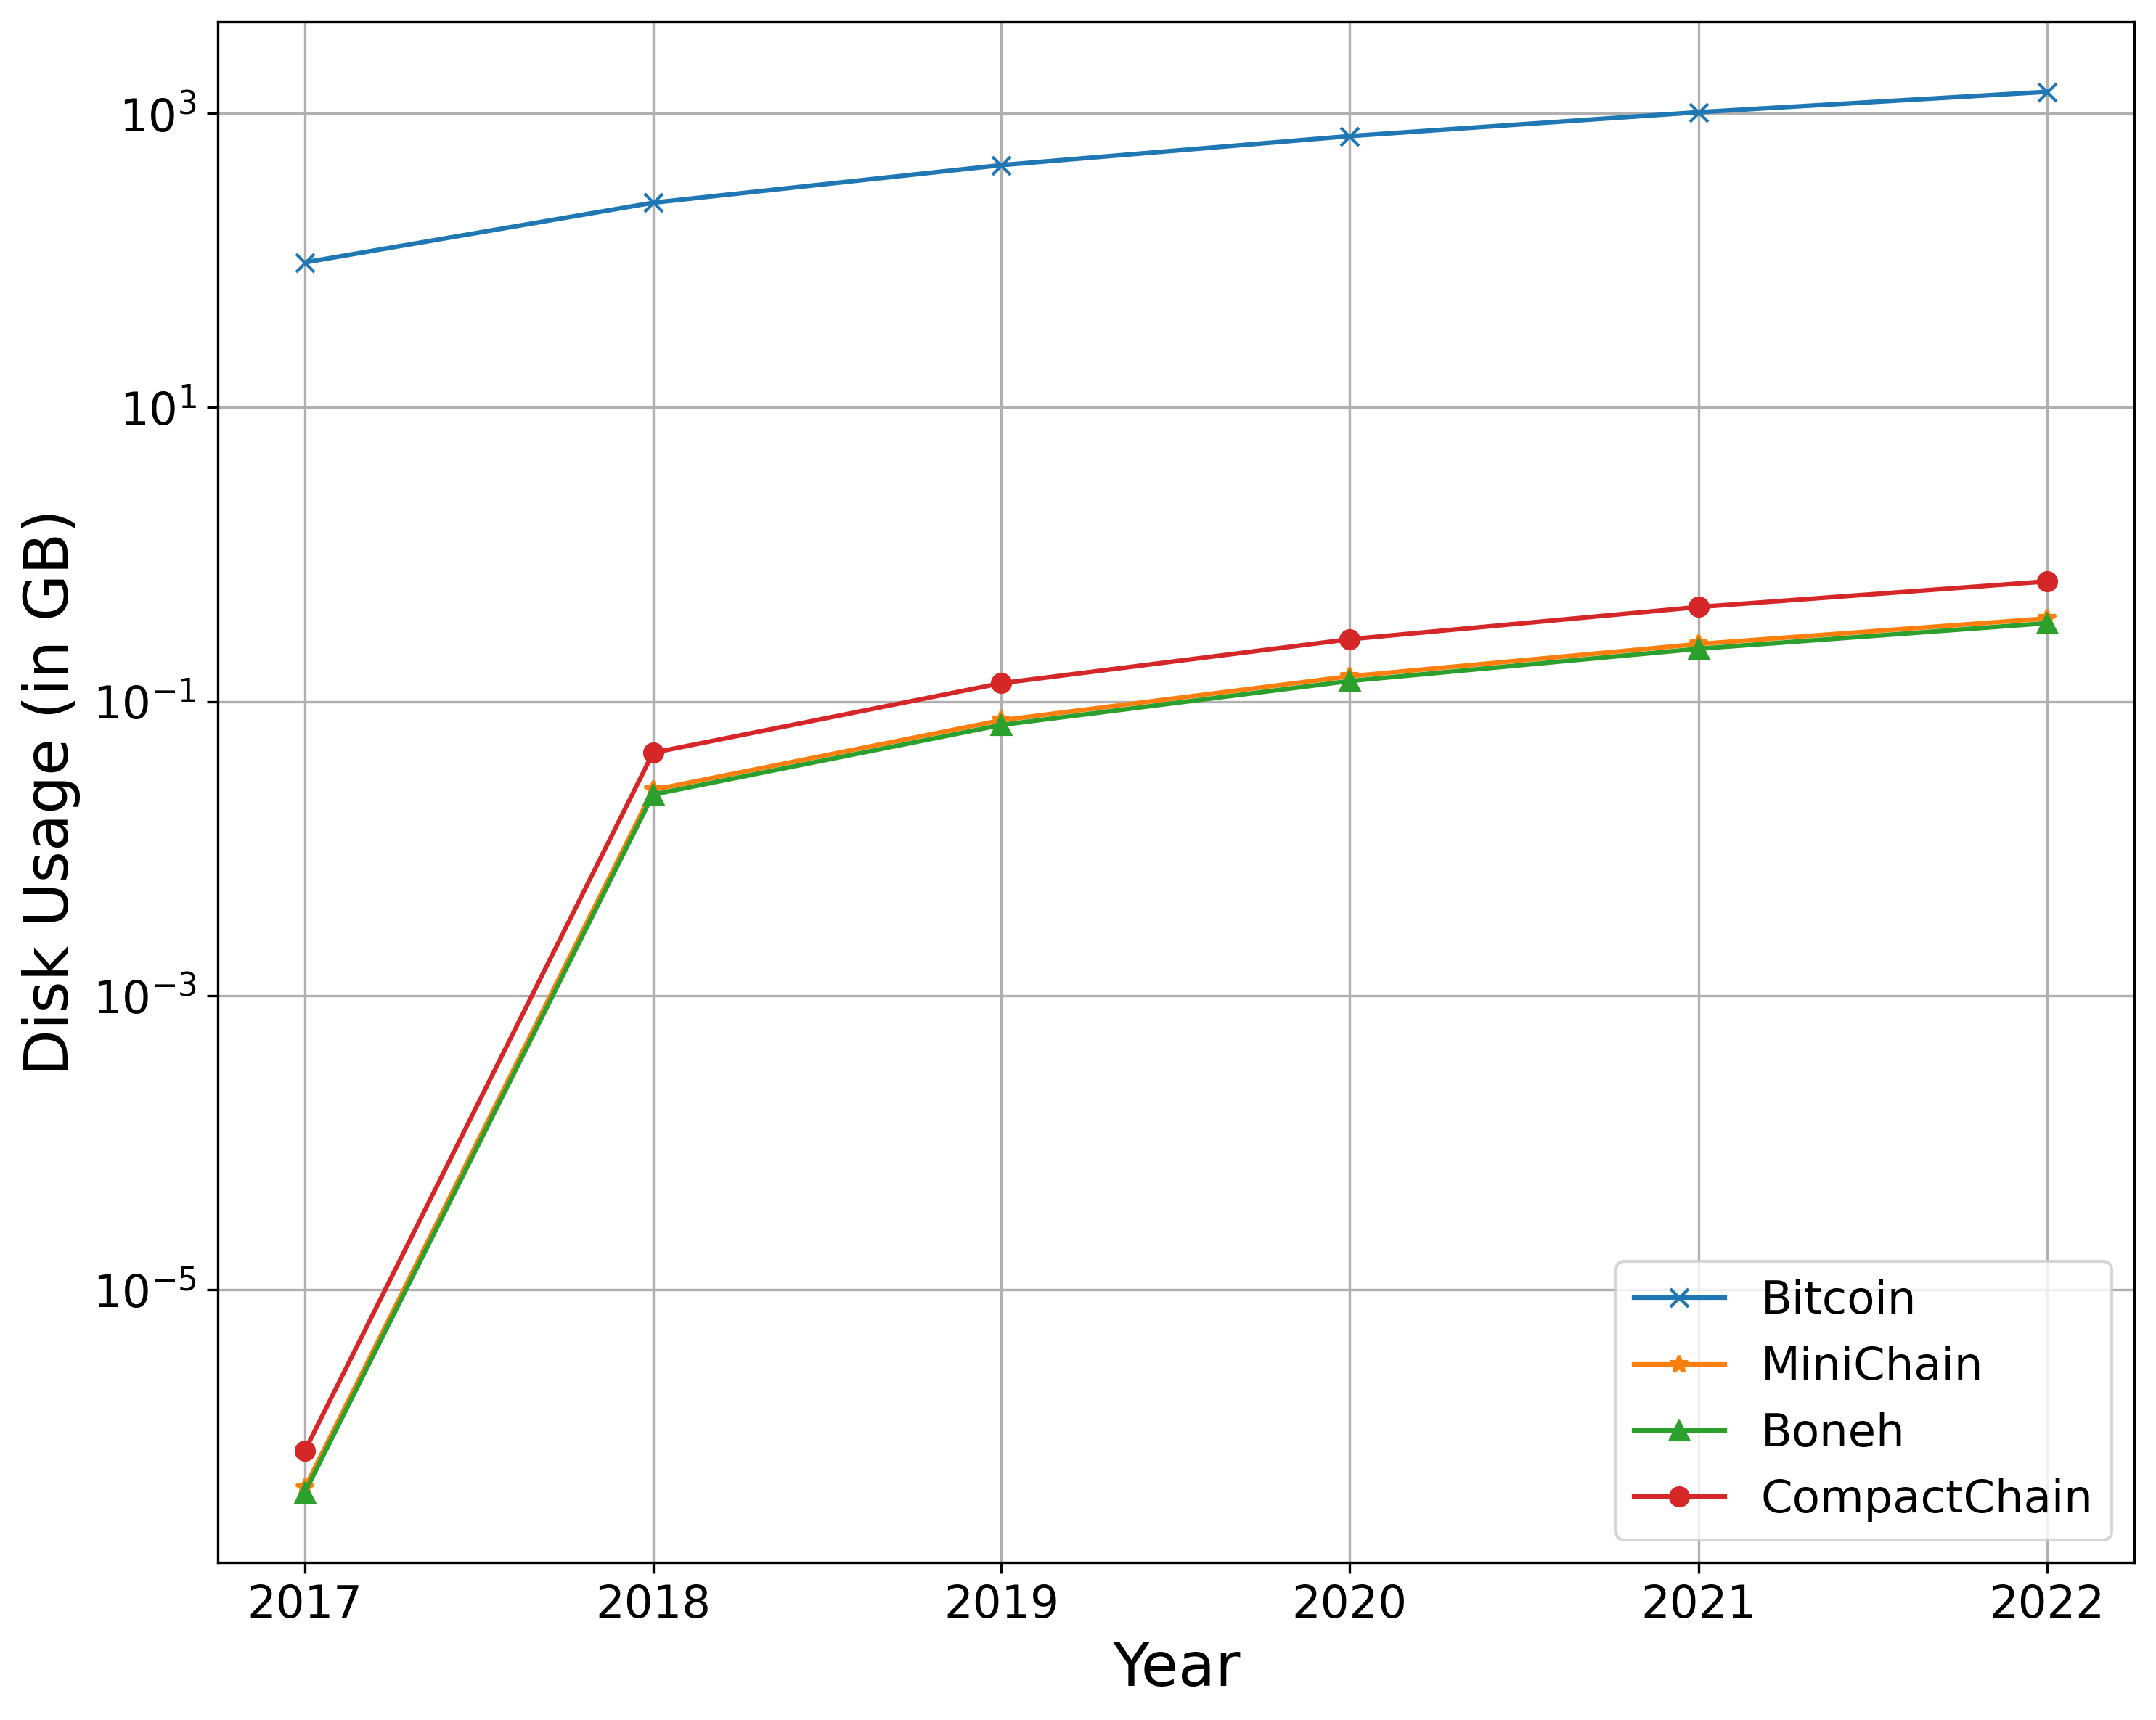

In [28]:
plt.figure(figsize=(10, 8))
# plt.title('Disk Usage', fontsize=25)
plt.semilogy(dates, np.cumsum(bitcoin_size)*1e-3, '-x',label='Bitcoin')
plt.semilogy(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "MC") for N in Ns])*1e-9, '-*', label='MiniChain')
plt.semilogy(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "B") for N in Ns])*1e-9, '-^', label='Boneh')
plt.semilogy(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "CC") for N in Ns])*1e-9, '-o', label='CompactChain')
plt.ylabel('Disk Usage (in GB)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('disk_usage.eps',  bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


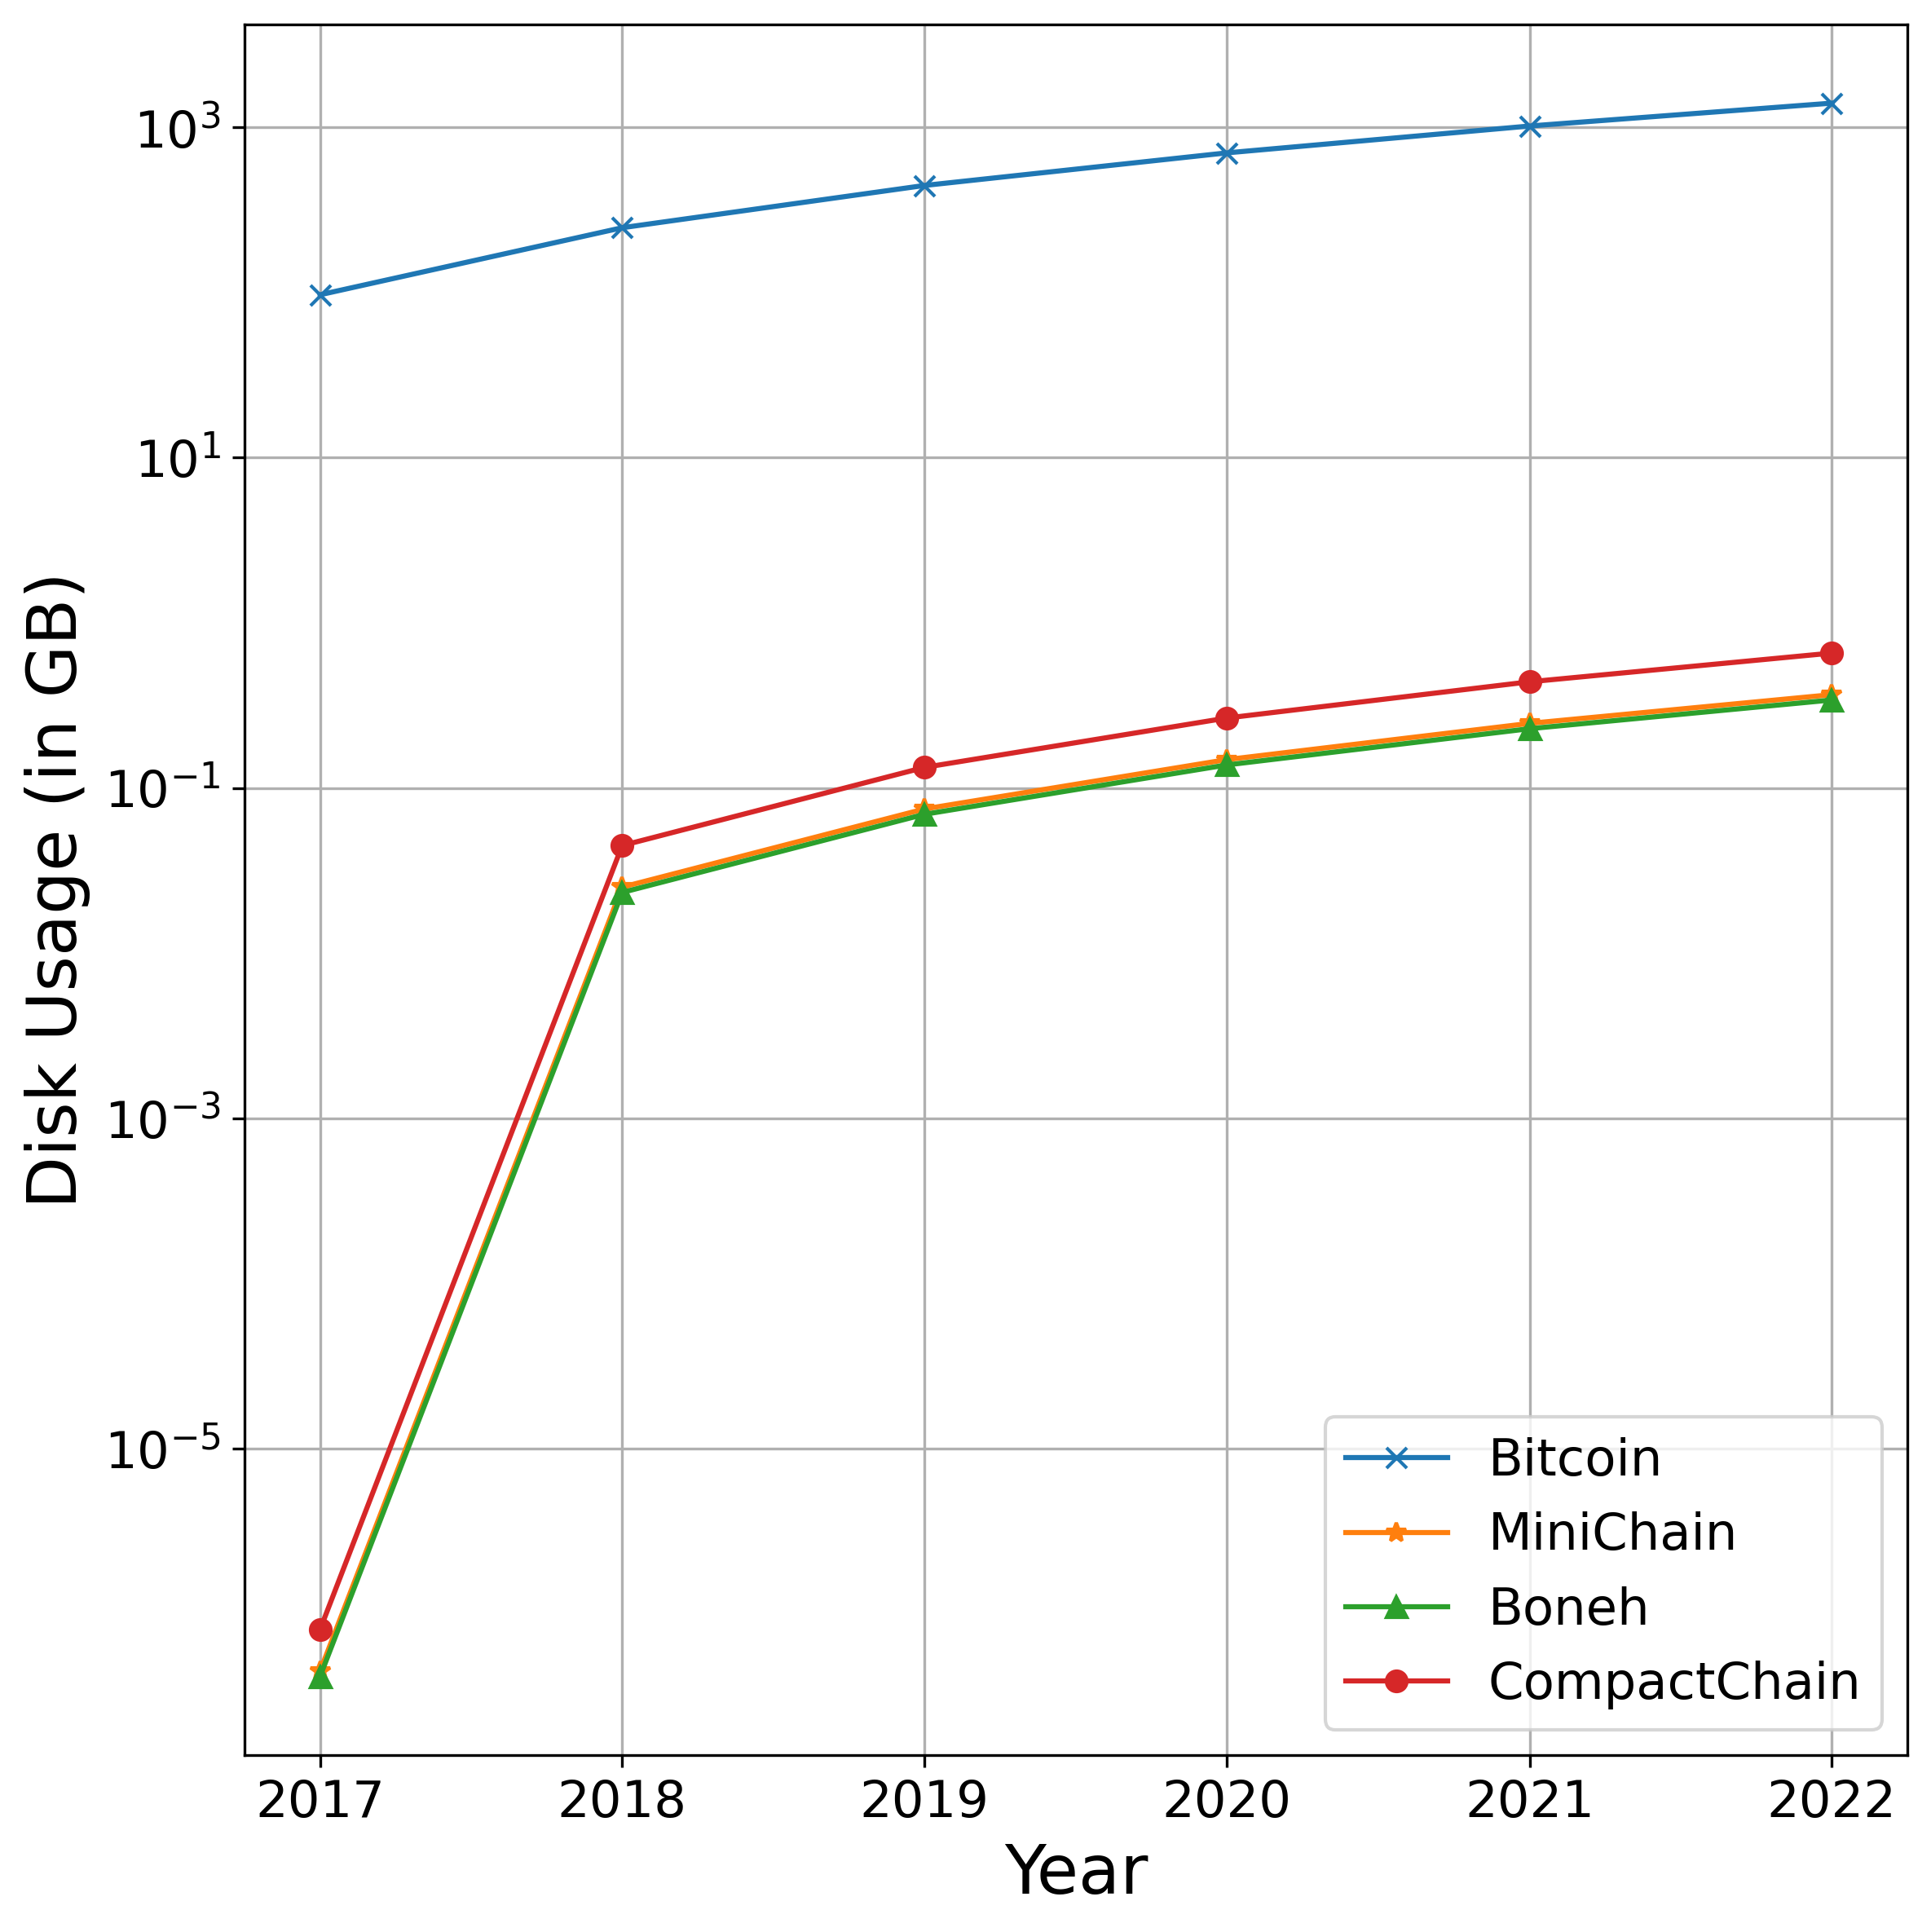

In [9]:
plt.figure(figsize=(8, 8))
# plt.title('Disk Usage', fontsize=25)
plt.semilogy(dates, np.cumsum(bitcoin_size)*1e-3, '-x',label='Bitcoin')
plt.semilogy(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "MC") for N in Ns])*1e-9, '-*', label='MiniChain')
plt.semilogy(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "B") for N in Ns])*1e-9, '-^', label='Boneh')
plt.semilogy(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "CC") for N in Ns])*1e-9, '-o', label='CompactChain')
plt.ylabel('Disk Usage (in GB)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig('disk_usage.eps')

In [137]:
bitcoin_size

array([ 96929.   , 149942.   , 198101.   , 255841.   , 318686.   ,
       382992.583])

In [143]:
np.cumsum([Disk_usage(N-Ns[0]+1, "MC") for N in Ns])*1e-6

array([4.48000000e-04, 2.50888960e+01, 7.45933440e+01, 1.48424192e+02,
       2.46088640e+02, 3.67273088e+02])

<Figure size 3000x2400 with 0 Axes>

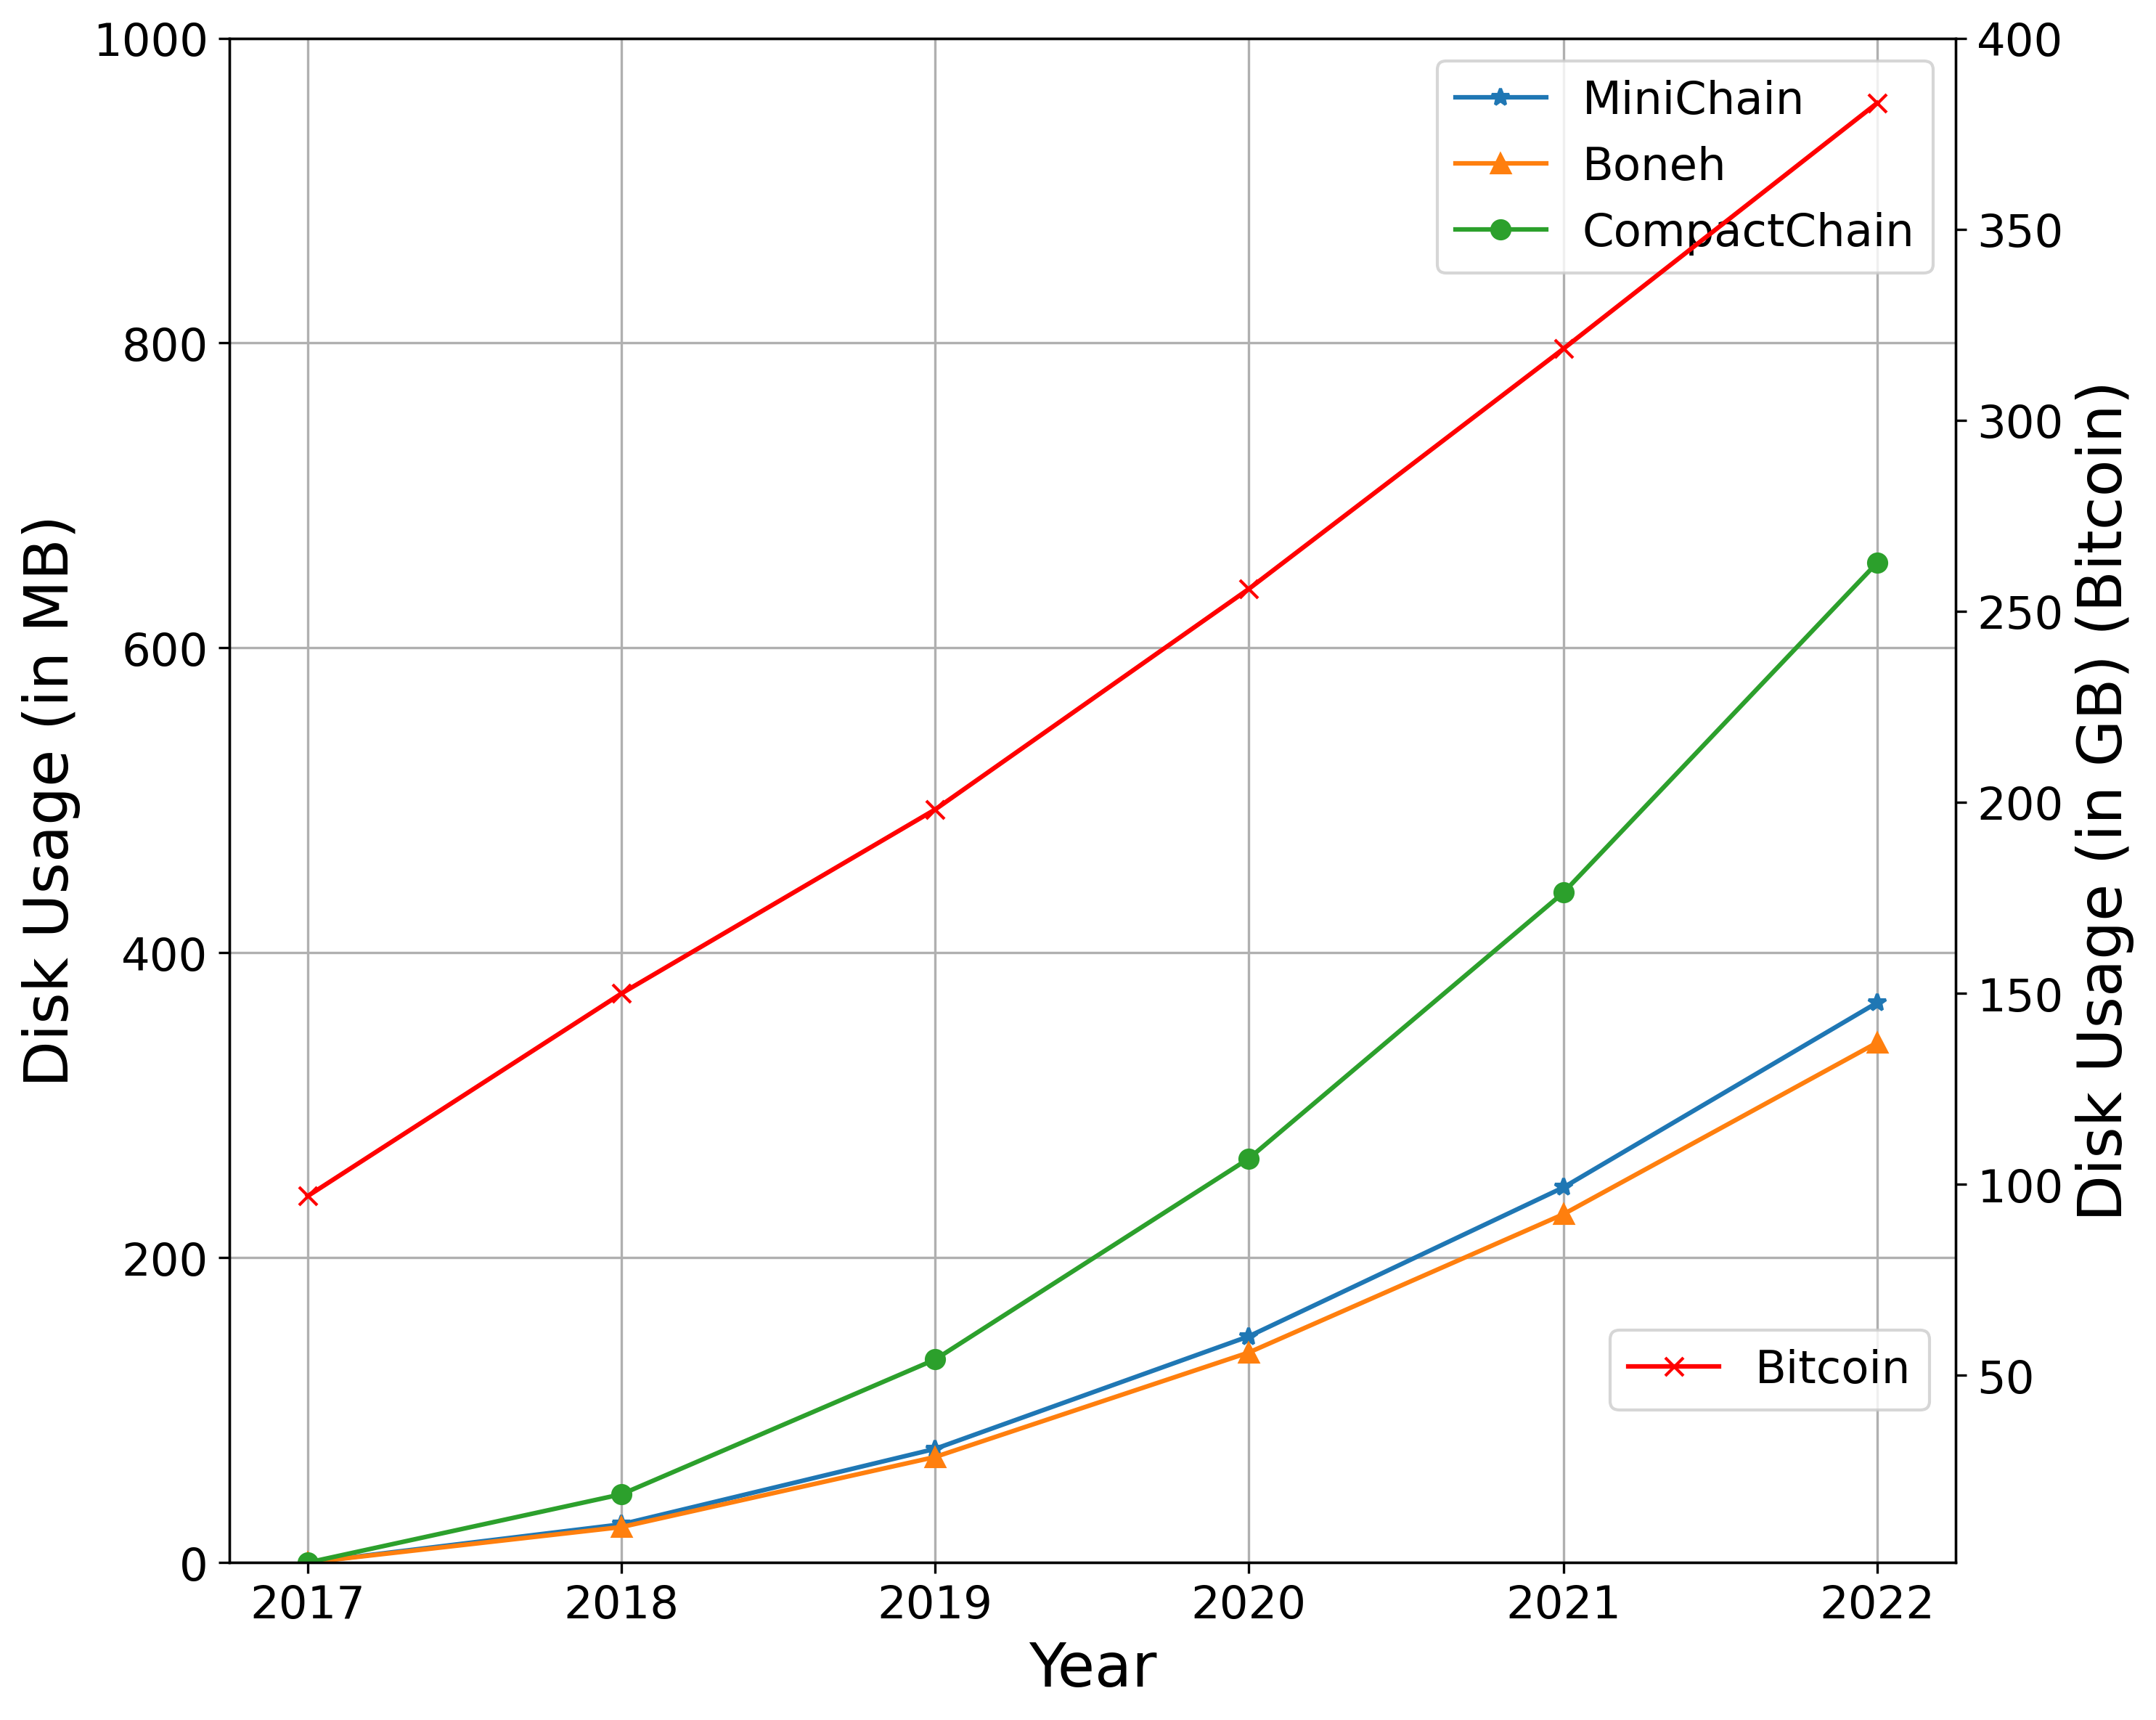

In [231]:
plt.figure(figsize=(10, 8))
fig,ax = plt.subplots(figsize=(10, 8))

# plt.title('RAM Usage', fontsize=25)

ax.plot(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "MC") for N in Ns])*1e-6, '-*', label='MiniChain')
ax.plot(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "B") for N in Ns])*1e-6, '-^', label='Boneh')
ax.plot(dates, np.cumsum([Disk_usage(N-Ns[0]+1, "CC") for N in Ns])*1e-6, '-o', label='CompactChain')

ax2=ax.twinx()

ax2.plot(dates, bitcoin_size*1e-3, '-rx',label='Bitcoin')

# ax2.text(pd.Timestamp('2021-11-01'), 1.005*utxo_size[-1]*1e-9, '19GB', fontsize=15)
# ax2.text(pd.Timestamp('2016-10-01'), 1.03*utxo_size[0]*1e-9, '10GB', fontsize=15)

# ax.text(pd.Timestamp('2021-11-15'), 0.95*RAM_usage(blocks_per_day, avg_trans[0], "MC")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[0], "MC")*1e-6, 2), fontsize=15)
# ax.text(pd.Timestamp('2016-10-01'), 0.95*RAM_usage(blocks_per_day, avg_trans[5], "MC")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[5], "MC")*1e-6, 2), fontsize=15)

# ax.text(pd.Timestamp('2021-11-15'), 1.05*RAM_usage(blocks_per_day, avg_trans[0], "CC")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[0], "CC")*1e-6, 2), fontsize=15)
# ax.text(pd.Timestamp('2016-10-01'), 1.05*RAM_usage(blocks_per_day, avg_trans[5], "CC")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[5], "CC")*1e-6, 2), fontsize=15)
# ax.text(pd.Timestamp('2021-11-15'), 0.9*RAM_usage(blocks_per_day, avg_trans[0], "B")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[0], "B")*1e-6, 2), fontsize=15)
# ax.text(pd.Timestamp('2016-10-01'), 0.9*RAM_usage(blocks_per_day, avg_trans[5], "B")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[5], "B")*1e-6, 2), fontsize=15)

ax.grid()
ax.set_ylabel('Disk Usage (in MB)', fontsize=20)
ax2.set_ylabel('Disk Usage (in GB) (Bitcoin)', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_ylim([1, 400])
ax.set_ylim([0, 1000])
# ax.set_xticks(fontsize=15)
# ax.set_yticks(fontsize=15)
ax.legend(fontsize=15)#, loc=(0.5, 0.8))
ax2.legend(fontsize=15, loc=(0.8, 0.1))
plt.savefig('disk_usage.jpeg',  bbox_inches='tight')

In [10]:
blocks_per_day = 144

utxo_size = df['UTXO Set'].to_numpy()[::-1]*trasaction_size
avg_trans = df['Average Transaction per Block'][::-1]

In [11]:
dates[0]

Timestamp('2022-01-01 00:00:00')

In [12]:
bs = df['Block Size (in MB)']

In [13]:
avg_trans

5    1830
4    2300
3    1575
2    1446
1    1732
0    1086
Name: Average Transaction per Block, dtype: int64

In [14]:
RAM_usage(blocks_per_day, avg_trans[0], "CC")

156384110592.0

In [15]:
bs = bs[::-1]

In [16]:
utxo_size

array([10980645250, 15502655000, 12399031000, 16167919500, 17394953500,
       19765473000])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


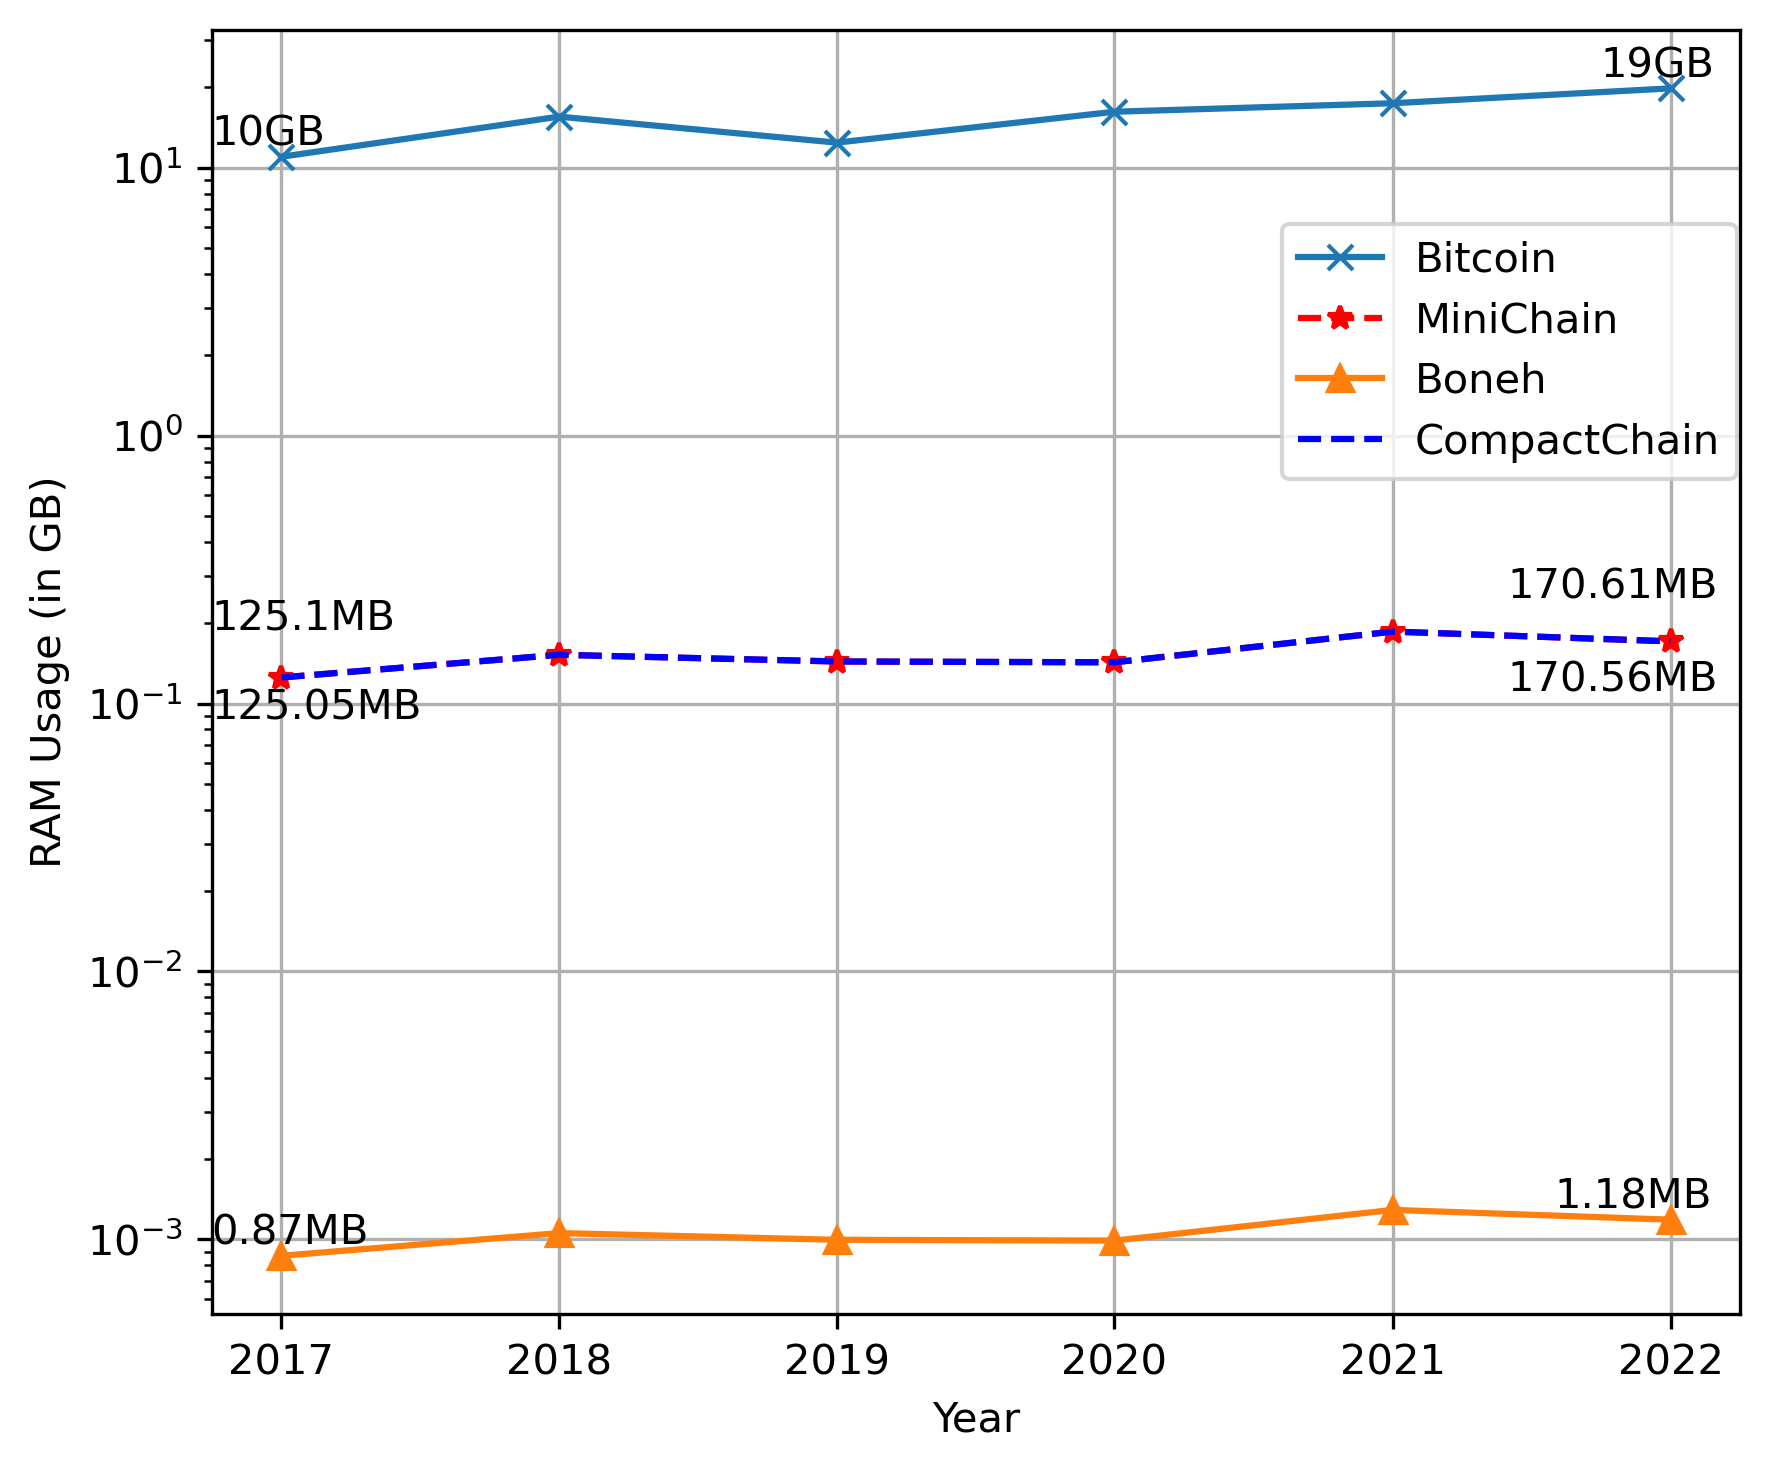

In [102]:
plt.figure(figsize=(6, 5))
# plt.title('RAM Usage', fontsize=25)
plt.semilogy(dates, utxo_size*1e-9, '-x',label='Bitcoin')
plt.semilogy(dates, [RAM_usage(blocks_per_day, t, "MC")*1e-9 for t in bs], 'r--*', label='MiniChain')
plt.semilogy(dates, [RAM_usage(blocks_per_day, t, "B")*1e-9 for t in bs], '-^', label='Boneh')
plt.semilogy(dates, [RAM_usage(blocks_per_day, t, "CC")*1e-9 for t in bs], 'b--', label='CompactChain')


plt.text(pd.Timestamp('2021-10-01'), 1.1*utxo_size[-1]*1e-9, '{}GB'.format(int(utxo_size[-1]*1e-9)), fontsize=10)
plt.text(pd.Timestamp('2016-10-01'), 1.1*utxo_size[0]*1e-9, '{}GB'.format(int(utxo_size[0]*1e-9)), fontsize=10)

plt.text(pd.Timestamp('2021-6-01'), 0.65*RAM_usage(blocks_per_day, bs[0], "MC")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[0], "MC")*1e-6, 2)), fontsize=10)
plt.text(pd.Timestamp('2016-10-01'), 0.7*RAM_usage(blocks_per_day, bs[5], "MC")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[5], "MC")*1e-6, 2)), fontsize=10)

plt.text(pd.Timestamp('2021-6-01'), 1.45*RAM_usage(blocks_per_day, bs[0], "CC")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[0], "CC")*1e-6, 2)), fontsize=10)
plt.text(pd.Timestamp('2016-10-01'), 1.5*RAM_usage(blocks_per_day, bs[5], "CC")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[5], "CC")*1e-6, 2)), fontsize=10)

plt.text(pd.Timestamp('2021-8-01'), 1.1*RAM_usage(blocks_per_day, bs[0], "B")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[0], "B")*1e-6, 2)), fontsize=10)
plt.text(pd.Timestamp('2016-10-01'), 1.1*RAM_usage(blocks_per_day, bs[5], "B")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[5], "B")*1e-6, 2)), fontsize=10)

plt.grid()
plt.ylabel('RAM Usage (in GB)')#, fontsize=20)
plt.xlabel('Year')#, fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.tight_layout()
plt.legend(loc=(0.7, 0.65))
plt.savefig('ram_usage.eps',  bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


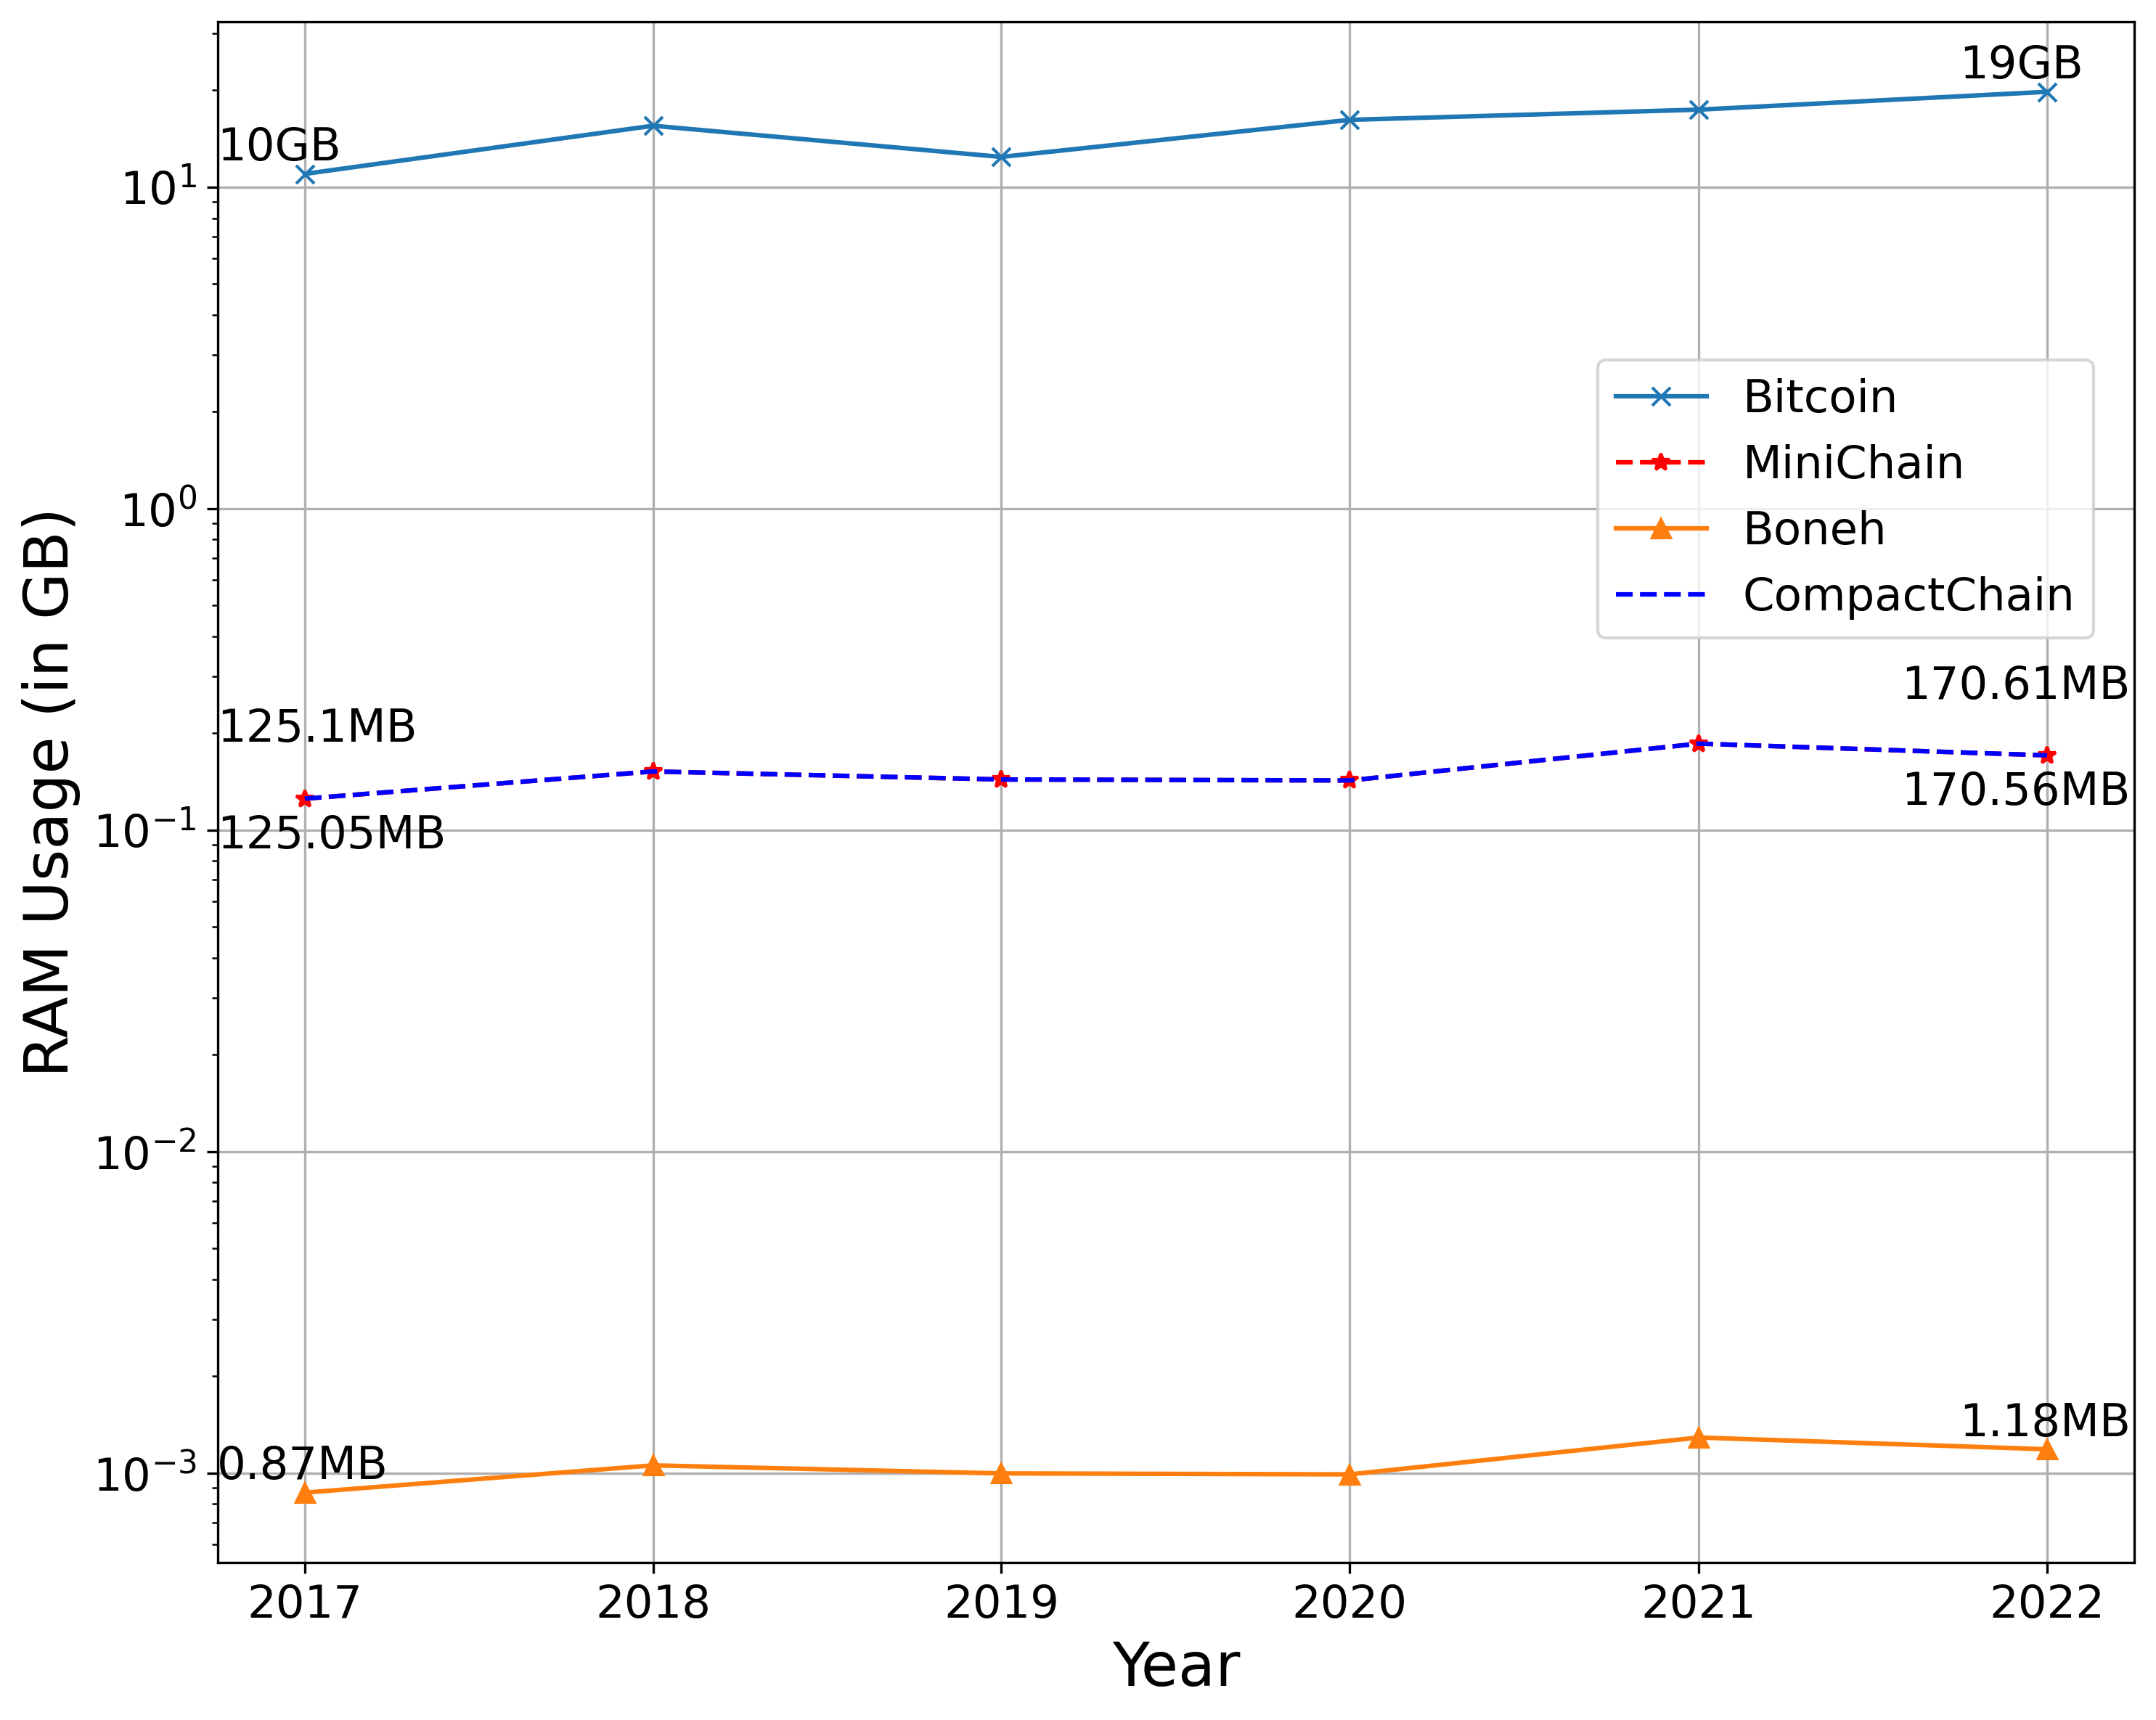

In [230]:
plt.figure(figsize=(10, 8))
# plt.title('RAM Usage', fontsize=25)
plt.semilogy(dates, utxo_size*1e-9, '-x',label='Bitcoin')
plt.semilogy(dates, [RAM_usage(blocks_per_day, t, "MC")*1e-9 for t in bs], 'r--*', label='MiniChain')
plt.semilogy(dates, [RAM_usage(blocks_per_day, t, "B")*1e-9 for t in bs], '-^', label='Boneh')
plt.semilogy(dates, [RAM_usage(blocks_per_day, t, "CC")*1e-9 for t in bs], 'b--', label='CompactChain')


plt.text(pd.Timestamp('2021-10-01'), 1.1*utxo_size[-1]*1e-9, '{}GB'.format(int(utxo_size[-1]*1e-9)), fontsize=15)
plt.text(pd.Timestamp('2016-10-01'), 1.1*utxo_size[0]*1e-9, '{}GB'.format(int(utxo_size[0]*1e-9)), fontsize=15)

plt.text(pd.Timestamp('2021-8-01'), 0.7*RAM_usage(blocks_per_day, bs[0], "MC")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[0], "MC")*1e-6, 2)), fontsize=15)
plt.text(pd.Timestamp('2016-10-01'), 0.7*RAM_usage(blocks_per_day, bs[5], "MC")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[5], "MC")*1e-6, 2)), fontsize=15)

plt.text(pd.Timestamp('2021-8-01'), 1.5*RAM_usage(blocks_per_day, bs[0], "CC")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[0], "CC")*1e-6, 2)), fontsize=15)
plt.text(pd.Timestamp('2016-10-01'), 1.5*RAM_usage(blocks_per_day, bs[5], "CC")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[5], "CC")*1e-6, 2)), fontsize=15)

plt.text(pd.Timestamp('2021-10-01'), 1.1*RAM_usage(blocks_per_day, bs[0], "B")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[0], "B")*1e-6, 2)), fontsize=15)
plt.text(pd.Timestamp('2016-10-01'), 1.1*RAM_usage(blocks_per_day, bs[5], "B")*1e-9, '{}MB'.format(np.round(RAM_usage(blocks_per_day, bs[5], "B")*1e-6, 2)), fontsize=15)

plt.grid()
plt.ylabel('RAM Usage (in GB)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, loc=(0.72, 0.6))
plt.savefig('ram_usage.eps',  bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 3000x2400 with 0 Axes>

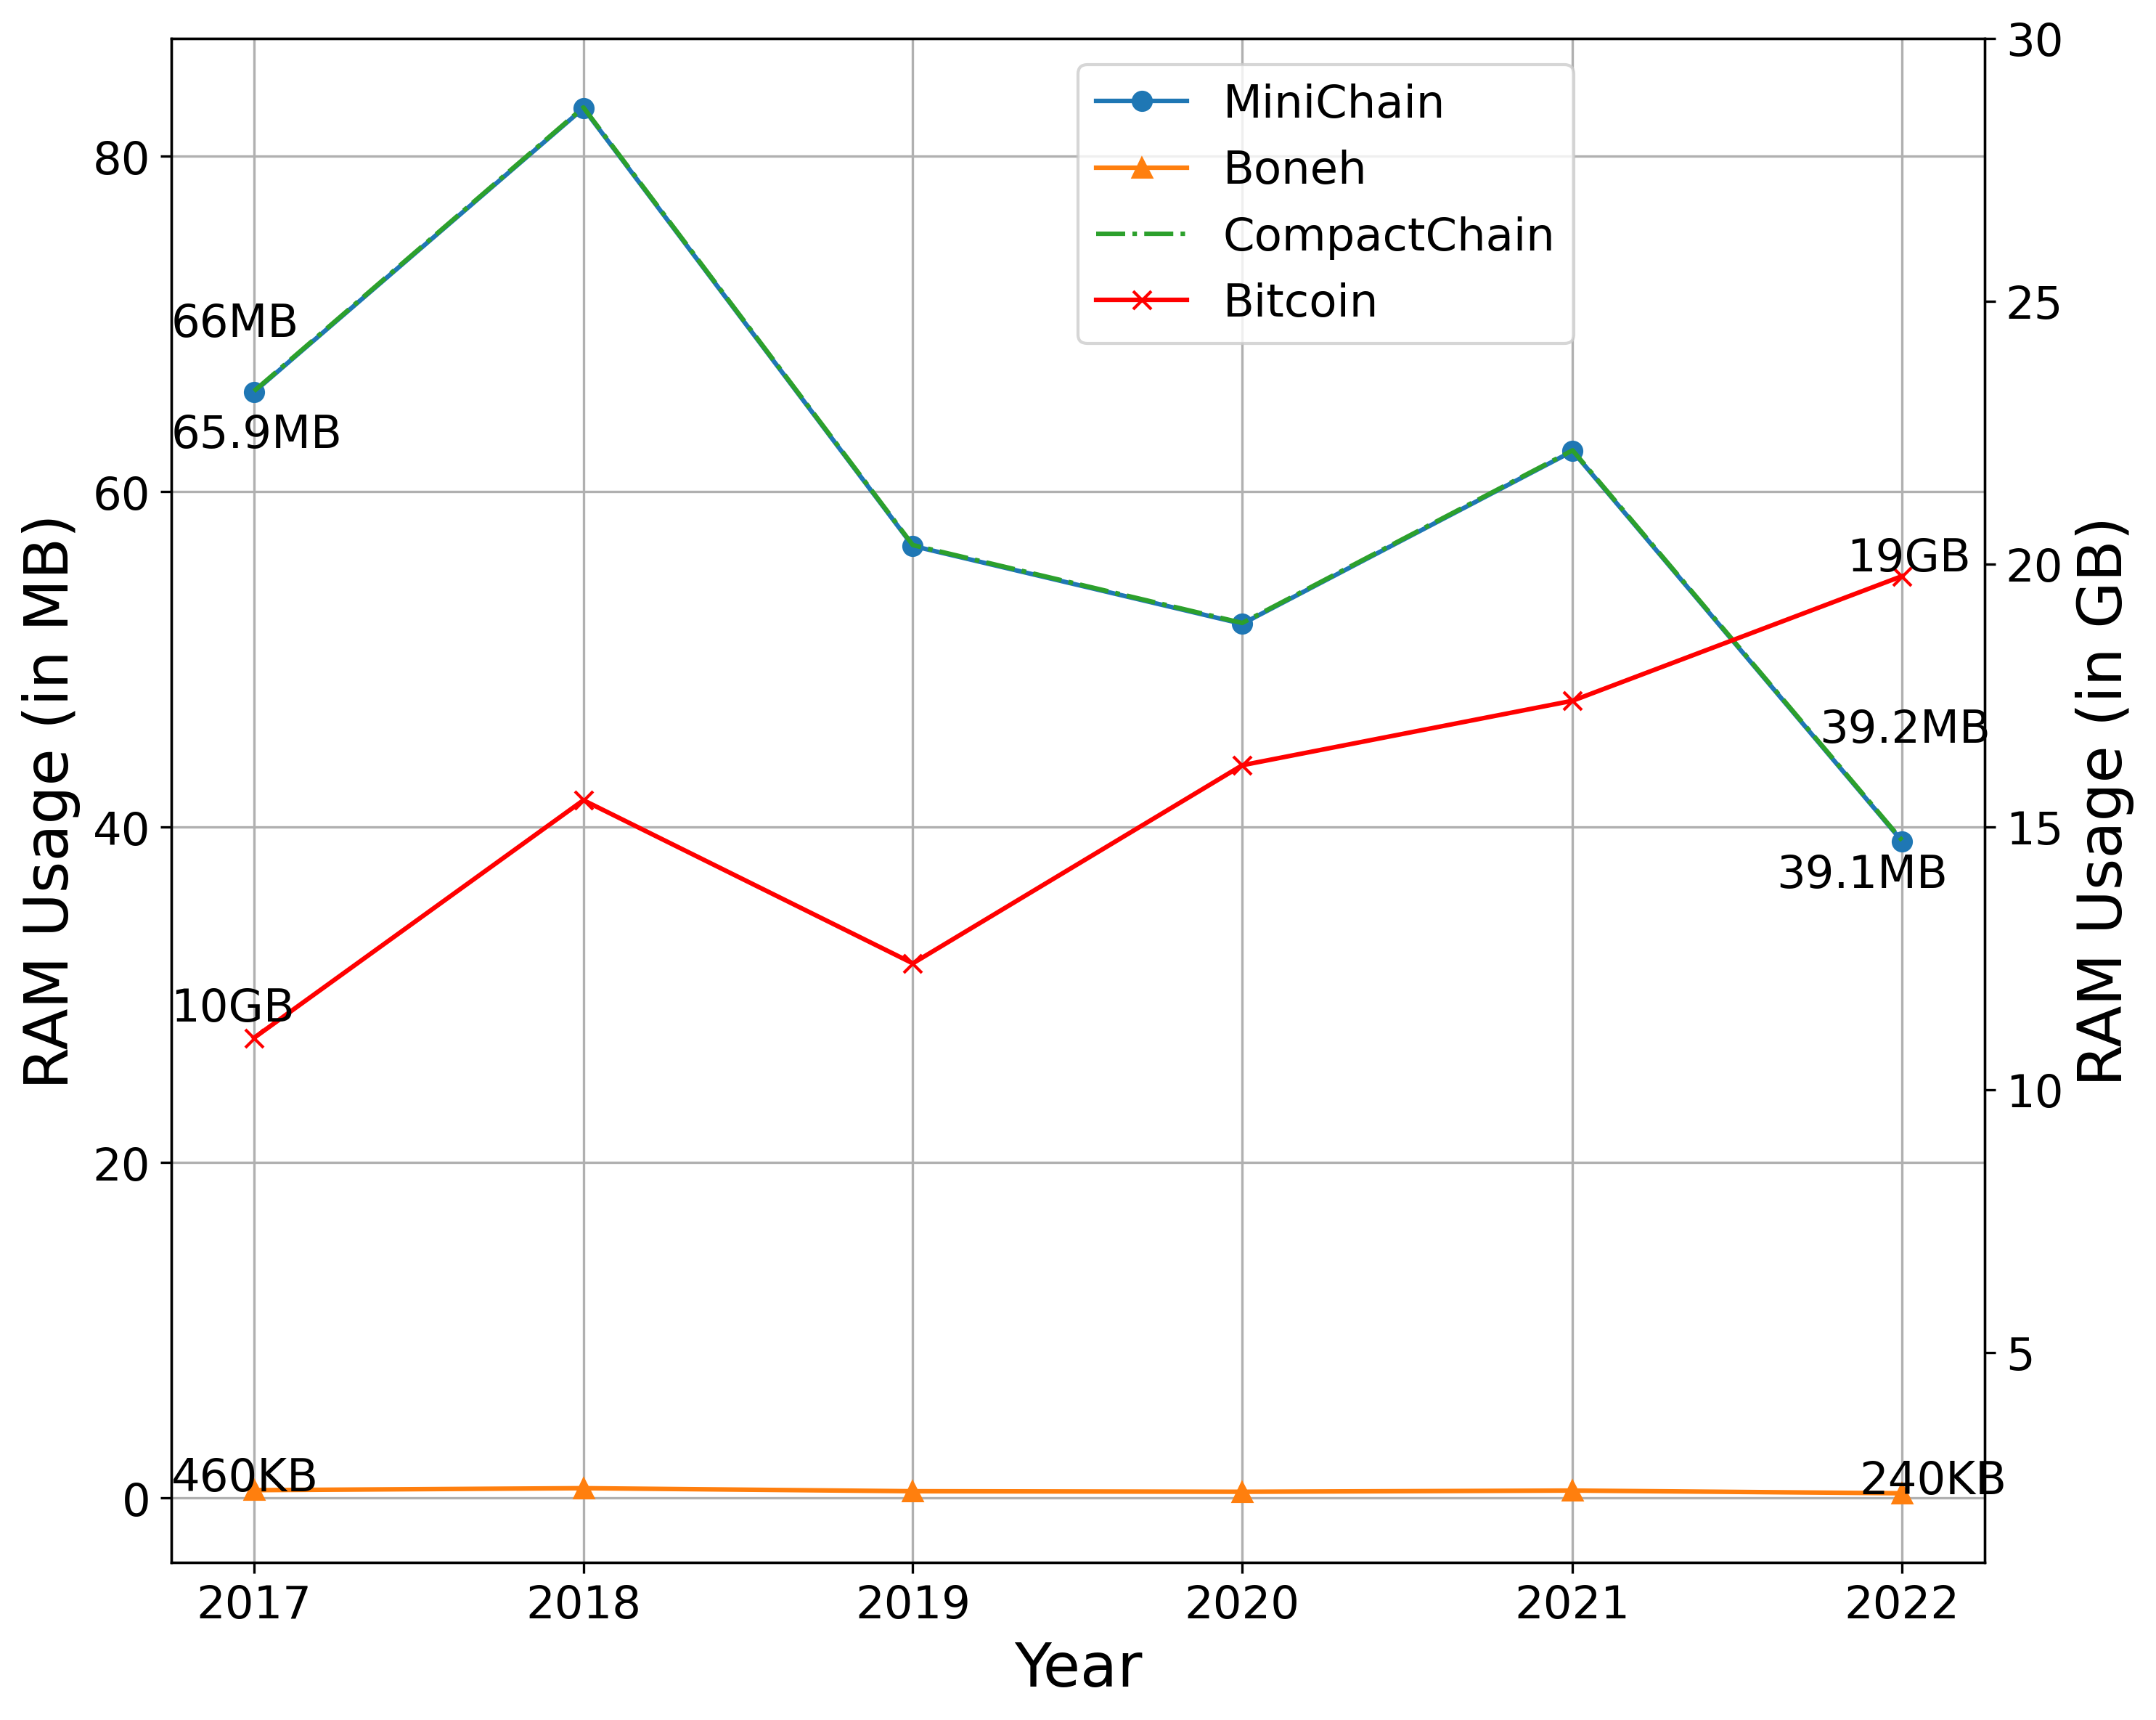

In [126]:
plt.figure(figsize=(10, 8))
fig,ax = plt.subplots(figsize=(10, 8))

# plt.title('RAM Usage', fontsize=25)

ax.plot(dates, [RAM_usage(blocks_per_day, t, "MC")*1e-6 for t in avg_trans], '-o', label='MiniChain')
ax.plot(dates, [RAM_usage(blocks_per_day, t, "B")*1e-6 for t in avg_trans], '-^', label='Boneh')
ax.plot(dates, [RAM_usage(blocks_per_day, t, "CC")*1e-6 for t in avg_trans], '-.', label='CompactChain')

ax2=ax.twinx()

ax2.plot(dates, utxo_size*1e-9, '-rx',label='Bitcoin')

ax2.text(pd.Timestamp('2021-11-01'), 1.005*utxo_size[-1]*1e-9, '19GB', fontsize=15)
ax2.text(pd.Timestamp('2016-10-01'), 1.03*utxo_size[0]*1e-9, '10GB', fontsize=15)

# ax.text(pd.Timestamp('2021-11-15'), 0.95*RAM_usage(blocks_per_day, avg_trans[0], "MC")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[0], "MC")*1e-6, 2), fontsize=15)
# ax.text(pd.Timestamp('2016-10-01'), 0.95*RAM_usage(blocks_per_day, avg_trans[5], "MC")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[5], "MC")*1e-6, 2), fontsize=15)


ax.text(pd.Timestamp('2021-8-15'), 0.93*RAM_usage(blocks_per_day, avg_trans[0], "MC")*1e-6, '39.1MB', fontsize=15)
ax.text(pd.Timestamp('2016-10-01'), 0.95*RAM_usage(blocks_per_day, avg_trans[5], "MC")*1e-6, '65.9MB', fontsize=15)

# ax.text(pd.Timestamp('2021-11-15'), 1.05*RAM_usage(blocks_per_day, avg_trans[0], "CC")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[0], "CC")*1e-6, 2), fontsize=15)
# ax.text(pd.Timestamp('2016-10-01'), 1.05*RAM_usage(blocks_per_day, avg_trans[5], "CC")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[5], "CC")*1e-6, 2), fontsize=15)

ax.text(pd.Timestamp('2021-10-01'), 1.15*RAM_usage(blocks_per_day, avg_trans[0], "CC")*1e-6, '39.2MB', fontsize=15)
ax.text(pd.Timestamp('2016-10-01'), 1.05*RAM_usage(blocks_per_day, avg_trans[5], "CC")*1e-6, '66MB', fontsize=15)

# ax.text(pd.Timestamp('2021-11-15'), 0.9*RAM_usage(blocks_per_day, avg_trans[0], "B")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[0], "B")*1e-6, 2), fontsize=15)
# ax.text(pd.Timestamp('2016-10-01'), 0.9*RAM_usage(blocks_per_day, avg_trans[5], "B")*1e-6, np.round(RAM_usage(blocks_per_day, avg_trans[5], "B")*1e-6, 2), fontsize=15)

ax.text(pd.Timestamp('2021-11-15'), 0.9*RAM_usage(blocks_per_day, avg_trans[0], "B")*1e-6, '240KB', fontsize=15)
ax.text(pd.Timestamp('2016-10-01'), 0.9*RAM_usage(blocks_per_day, avg_trans[5], "B")*1e-6, '460KB', fontsize=15)

ax.grid()
ax.set_ylabel('RAM Usage (in MB)', fontsize=20)
ax2.set_ylabel('RAM Usage (in GB)', fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.set_ylim([1, 30])
# ax.set_xticks(fontsize=15)
# ax.set_yticks(fontsize=15)
fig.legend(fontsize=15, loc=(0.5, 0.8))
plt.savefig('ram_usage.eps',  bbox_inches='tight')

In [22]:
import os

In [54]:
def get_answer_from_cpp(total, i):
    os.system('./MMRTree/main {} {} >> output.txt'.format(total, i))
    with open('output.txt', 'r') as fd:
        output = float(fd.read())
        fd.close()
    os.system('rm -rf output.txt')
    return int(output)

In [66]:
def Mempool_usage(N, height, trans_block, arch_type="CC"):
    if arch_type == "CC":
        return (trasaction_size + 384 + 400)*N # RSA + RSA + TMR # 352Bytes extra
    elif arch_type == "MC":
#         exist_proof = 32*(np.sum([get_answer_from_cpp(trans_block, i) for i in range(trans_block)]) + get_answer_from_cpp(height, height))
        exist_proof = 32*(get_answer_from_cpp(trans_block, 0) + get_answer_from_cpp(height, height))
#         print(exist_proof)#, exist_proof/32)
        return (trasaction_size + 400 + exist_proof)*N # RSA + MMR + TMR 
    elif arch_type == "B":
        return (trasaction_size + 400)*N # RSA + TMR

In [71]:
def Mempool_usage(memsize, N, height, trans_block, arch_type="CC"):
    if arch_type == "CC":
        return memsize + (384 + 400)*N # RSA + RSA + TMR # 352Bytes extra
    elif arch_type == "MC":
#         exist_proof = 32*(np.sum([get_answer_from_cpp(trans_block, i) for i in range(trans_block)]) + get_answer_from_cpp(height, height))
        exist_proof = 32*(get_answer_from_cpp(trans_block, 0) + get_answer_from_cpp(height, height))
#         print(exist_proof)#, exist_proof/32)
        return memsize + (400 + exist_proof)*N # RSA + MMR + TMR 
    elif arch_type == "B":
        return memsize + (trasaction_size + 400)*N # RSA + TMR

In [72]:
df

,Date,Height,Blockchain Size (in MB),Average Transaction per Block,Total Transaction,UTXO Set,Mempool Count,Mempool Size (in B),Block Size (in MB)
0,2022-01-01,716500,382992.583,1086,699106399,79061892,13319,2627263,1.184
1,2021-01-01,664000,318686.000,1732,601835959,69579814,8367,49721566,1.288
2,2020-01-01,610800,255841.000,1446,490176938,64671678,3671,1540038,0.989
3,2019-01-01,556500,198101.000,1575,370039173,49596124,2515,1238543,0.996
4,2018-01-01,502000,149942.000,2300,289592587,62010620,94918,104589449,1.055
5,2017-01-01,446000,96929.000,1830,183961799,43922581,4400,4007832,0.868


In [77]:
memcount = df['Mempool Count'][::-1]
mempool_size = df['Mempool Size (in B)'][::-1]
avg_trans = df['Average Transaction per Block'][::-1]

In [78]:
Ns
print()

In [79]:
mempool_size

5      4007832
4    104589449
3      1238543
2      1540038
1     49721566
0      2627263
Name: Mempool Size (in B), dtype: int64

In [80]:
memcount

5     4400
4    94918
3     2515
2     3671
1     8367
0    13319
Name: Mempool Count, dtype: int64

In [81]:
mempool_size.to_numpy()/memcount.to_numpy()

array([ 910.87090909, 1101.89267578,  492.46242545,  419.51457369,
       5942.57989722,  197.25677603])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


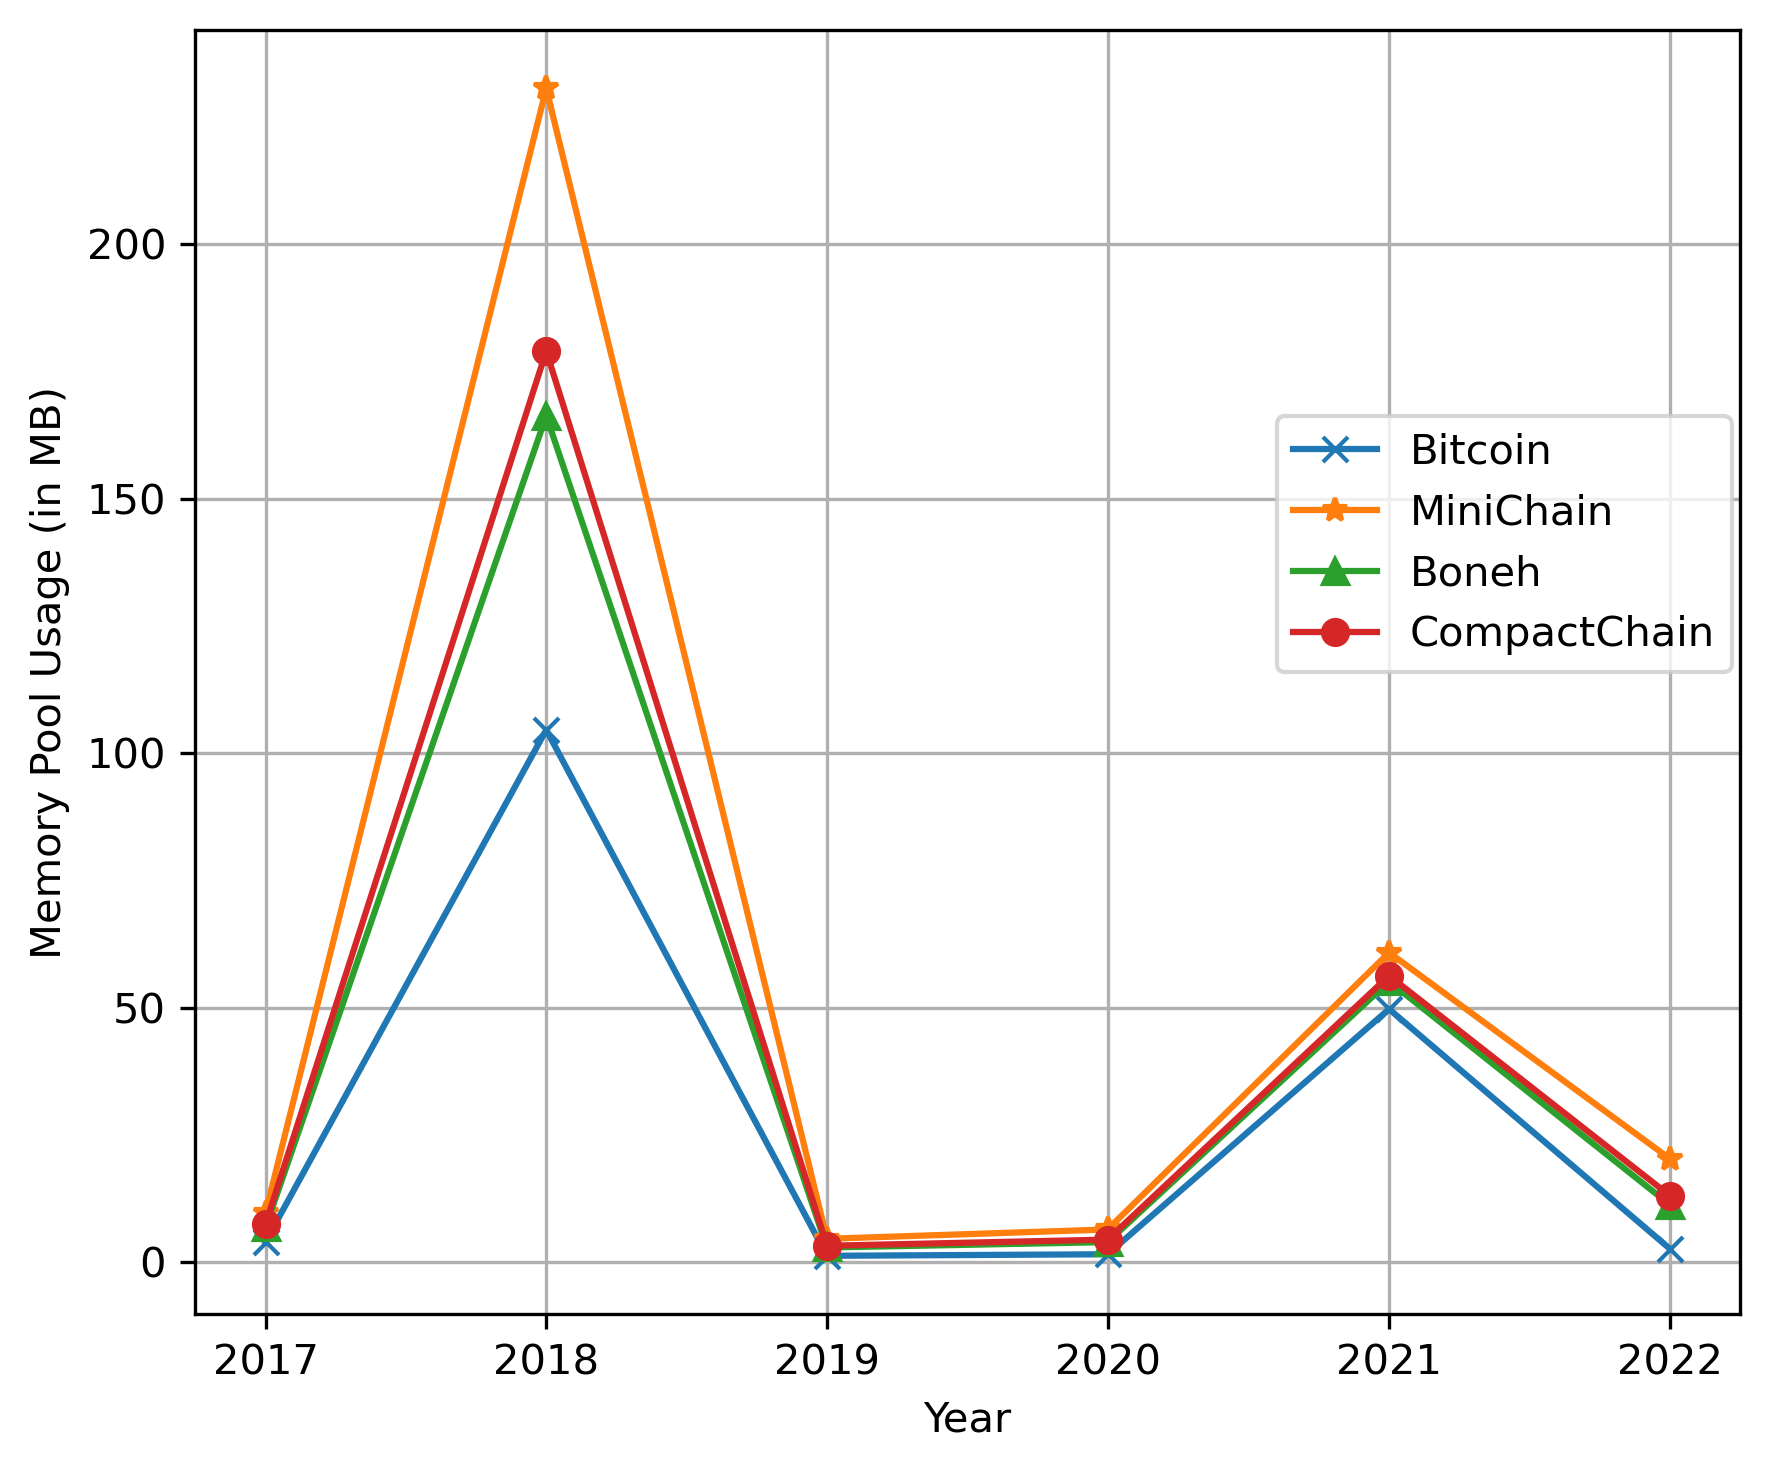

In [96]:
import os
plt.figure(figsize=(6, 5))
# plt.title('Mempool Usage')#, fontsize=25)
plt.plot(dates, mempool_size*1e-6, '-x',label='Bitcoin')
plt.plot(dates, [Mempool_usage(memsize, mc, N, avg_t, "MC")*1e-6 for (memsize, mc, N, avg_t) in zip(mempool_size, memcount, Ns, avg_trans)], '-*', label='MiniChain')
plt.plot(dates, [Mempool_usage(memsize, mc, N, avg_t, "B")*1e-6 for (memsize, mc, N, avg_t) in zip(mempool_size, memcount, Ns, avg_trans)], '-^', label='Boneh')
plt.plot(dates, [Mempool_usage(memsize, mc, N, avg_t, "CC")*1e-6 for (memsize, mc, N, avg_t) in zip(mempool_size, memcount, Ns, avg_trans)], '-o', label='CompactChain')


# plt.text(pd.Timestamp('2022-02-01'), 0.99*mempool_size[0]*1e-6,int(mempool_size[0]*1e-6), fontsize=15)
# plt.text(pd.Timestamp('2016-10-01'), 0.99*mempool_size[5]*1e-6, int(mempool_size[5]*1e-6), fontsize=15)

# # plt.text(pd.Timestamp('2022-02-01'), 0.95*Mempool_usage(mempool_size[0], memcount[0], Ns[-1], avg_trans[0], "MC")*1e-9, '244TB', fontsize=15)
# # plt.text(pd.Timestamp('2016-10-01'), 0.95*Mempool_usage(mempool_size[5], memcount[5], Ns[0], avg_trans[5], "MC")*1e-9, '108TB', fontsize=15)


# plt.text(pd.Timestamp('2022-02-01'), 1.1*Mempool_usage(mempool_size[0], memcount[0], Ns[-1], avg_trans[0], "MC")*1e-6, int(Mempool_usage(mempool_size[0], memcount[0], Ns[-1], avg_trans[0], "MC")*1e-6), fontsize=15)
# plt.text(pd.Timestamp('2016-10-01'), 0.95*Mempool_usage(mempool_size[5], memcount[5], Ns[0], avg_trans[5], "MC")*1e-6, int(Mempool_usage(mempool_size[5], memcount[5], Ns[0], avg_trans[5], "MC")*1e-6), fontsize=15)

# plt.text(pd.Timestamp('2022-02-01'), 1.05*Mempool_usage(mempool_size[0], memcount[0], Ns[-1], avg_trans[0], "CC")*1e-6, int(Mempool_usage(mempool_size[0], memcount[0], Ns[-1], avg_trans[0], "CC")*1e-6), fontsize=15)
# plt.text(pd.Timestamp('2016-10-01'), 1.05*Mempool_usage(mempool_size[5], memcount[5], Ns[0], avg_trans[5], "CC")*1e-6, int(Mempool_usage(mempool_size[5], memcount[5], Ns[0], avg_trans[5], "CC")*1e-6), fontsize=15)

# plt.text(pd.Timestamp('2022-02-01'), 0.5*Mempool_usage(mempool_size[0], memcount[0], Ns[-1], avg_trans[0], "B")*1e-6, int(Mempool_usage(mempool_size[0], memcount[0], Ns[-1], avg_trans[0], "B")*1e-6), fontsize=15)
# plt.text(pd.Timestamp('2016-10-01'), 0.9*Mempool_usage(mempool_size[5], memcount[5], Ns[0], avg_trans[5], "B")*1e-6, int(Mempool_usage(mempool_size[5], memcount[5], Ns[0], avg_trans[5], "B")*1e-6), fontsize=15)


plt.grid()
plt.ylabel('Memory Pool Usage (in MB)')#, fontsize=20)
plt.xlabel('Year')#, fontsize=20)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
plt.legend(loc=(0.7, 0.5))
plt.tight_layout()
# plt.savefig('mempool_usage.jpeg', bbox_inches='tight')
plt.savefig('mempool_usage.eps', bbox_inches='tight')